# 多维异常检测算法仿真（算法研究）

## 什么是异常检测？
也可称为过程监控，其主要目标是根据生产系统的运行状况，检测已经发生的故障或者实时地预测可能发生的故障，发出警报并指示发生故障的位置，以便生产维护人员的检查和维修，从而保证生产安全和产品质量，减少系统停机检修的次数。
## 异常检测的方法论
* 基于知识     
  方法：专家系统（能够根据现有数据，推理故障发生与否并决策是否报警以及如何修复）    
  问题：受知识的广度和深度制约，容易出现推理结果冲突、推理组合爆炸等问题      
  
* 基于模型    
  方法：数学建模（为系统建立较为精确的数学模型，通过评估实际输出和预测输出的残差，判断系统是否处于正常运行状态）       
  问题：受系统复杂度制约，建模难度较高    

* 基于数据    
  方法：通过记录系统运行的过程数据，采用合理的方法进行统筹和利用，达到对系统监控的目的     
  优势：简单，自学习能力强，不需要过多的先验知识
  
## 为什么需要多维异常检测？
系统生产运行过程中会存在着大量的、 高度相关的过程变量, 如温度、 压力、 流量、 液位等。这些过程变量处于一定的波动范围，对于监控生产过程的正常运行、 保证产品质量的一致性、 可靠性来说往往是至关重要的。 而由于单一监测指标本身受精度和灵敏度限制，在生产现场扰动较多的情况下，极易出现无故障虚假报警或者有故障不报的漏警现象，因此需要同时对各个变量进行监测，另一方面，由于多个变量间往往存在耦合和冗余，对于操作维护人员来说, 同时对大量的过程变量进行监控和识别又会显得效率十分低下，因此我们需要引入行之有效的多维异常检测技术来辅助人们改进系统监控的精准性和效率。    

## 基于数据的多维异常检测技术    
算法主要包括：基于信号处理的方法，如傅里叶变化、小波变换等；基于机器学习的方法，如支持向量机、神经网络、流行学习方法等；基于多元统计的方法，如主元分析法（PCA）、独立元分析法（ICA）、偏最小二乘法（PLS）、规范变量分析（CVA）、线性判别分析（LDA）等。其中，由于基于多元统计理论的方法具有算法简单，适用性强等特点，已成为了近年来的研究热点，其思路均是通过一系列数学变换，用一个低维空间表示原始数据的主要特征，同时还会得到表征原始数据空间到低维特征空间映射关系的投影矩阵。在特征空间中构造统计量，并基于各种数学分布估计得到正常数据统计量的波动范围，这个范围我们称之为控制限。当新样本到达后，通过投影矩阵将新样本投影到特征空间，通过计算并判断其统计量的值是否超过控制限，就可以判断该新样本是否是正常样本。 

## 算法研究过程：
## 1、数据采集

> 读取 CPU\磁盘读\磁盘写\网络出口\网络入口\内存等监控指标，数据来源：广西科大数据

In [473]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(15, 6))
from dateutil.parser import parse

In [474]:
#（数据时间：2016.10-2016.11）
vCpuUsage = pd.read_excel('../ECUST data/Guangxi university data 20161111/CPU_20161111105339.xlsx',converters={u'时间':parse})
vDiskRead = pd.read_excel('../ECUST data/Guangxi university data 20161111/DiskRead_20161111110123.xlsx',converters={u'时间':parse})
vDiskWrite = pd.read_excel('../ECUST data/Guangxi university data 20161111/DiskWrite_20161111110158.xlsx',converters={u'时间':parse})
vNwEgress = pd.read_excel('../ECUST data/Guangxi university data 20161111/NetworkEgress_20161111110304.xlsx',converters={u'时间':parse})
vNwIngress = pd.read_excel('../ECUST data/Guangxi university data 20161111/NetworkIngress_20161111110416.xlsx',converters={u'时间':parse})
vMemUsage = pd.read_excel('../ECUST data/Guangxi university data 20161111/Memory_20161111105932.xlsx',converters={u'时间':parse})

In [475]:
#（数据时间：2017.1-2017.2）
'''
vCpuUsage = pd.read_excel('../ECUST data/Guangxi university data 20170228/CPU_20170228171221.xlsx',converters={u'时间':parse})
vDiskRead = pd.read_excel('../ECUST data/Guangxi university data 20170228/DiskRead_20170228171404.xlsx',converters={u'时间':parse})
vDiskWrite = pd.read_excel('../ECUST data/Guangxi university data 20170228/DiskWrite_20170228171432.xlsx',converters={u'时间':parse})
vNwEgress = pd.read_excel('../ECUST data/Guangxi university data 20170228/NwEgress_20170228171526.xlsx',converters={u'时间':parse})
vNwIngress = pd.read_excel('../ECUST data/Guangxi university data 20170228/NwIngress_20170228171623.xlsx',converters={u'时间':parse})
vMemUsage = pd.read_excel('../ECUST data/Guangxi university data 20170228/Memory_20170228171333.xlsx',converters={u'时间':parse})
'''

"\nvCpuUsage = pd.read_excel('../ECUST data/Guangxi university data 20170228/CPU_20170228171221.xlsx',converters={u'时间':parse})\nvDiskRead = pd.read_excel('../ECUST data/Guangxi university data 20170228/DiskRead_20170228171404.xlsx',converters={u'时间':parse})\nvDiskWrite = pd.read_excel('../ECUST data/Guangxi university data 20170228/DiskWrite_20170228171432.xlsx',converters={u'时间':parse})\nvNwEgress = pd.read_excel('../ECUST data/Guangxi university data 20170228/NwEgress_20170228171526.xlsx',converters={u'时间':parse})\nvNwIngress = pd.read_excel('../ECUST data/Guangxi university data 20170228/NwIngress_20170228171623.xlsx',converters={u'时间':parse})\nvMemUsage = pd.read_excel('../ECUST data/Guangxi university data 20170228/Memory_20170228171333.xlsx',converters={u'时间':parse})\n"

## 2.数据预处理

### 2.1、修改index和columns

In [476]:
for var in (vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage):
    var.rename(columns={u'资源':'vres',u'类型':'vtype',u'时间':'vtime',u'最大值':'vmax',u'最小值':'vmin',u'平均值':'vavg',u'单位':'vunit'},
               inplace = True)
    if 'vtime' in var.columns.values:
        var.set_index('vtime',inplace=True) 

### 2.2、初步探索时间序列数据,形成待分析多维数据矩阵X

In [477]:
for var in (vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage):
    print(var.head())
    print('length :',len(var))

                           vres      vtype   vmax   vmin   vavg vunit
vtime                                                                
2016-10-01 00:00:09  JWC_WEB_ON  虚拟机CPU使用率  18.75  18.75  18.75     %
2016-10-01 00:01:08  JWC_WEB_ON  虚拟机CPU使用率   0.00   0.00   0.00     %
2016-10-01 00:02:09  JWC_WEB_ON  虚拟机CPU使用率   3.25   3.25   3.25     %
2016-10-01 00:03:09  JWC_WEB_ON  虚拟机CPU使用率   6.78   6.78   6.78     %
2016-10-01 00:04:08  JWC_WEB_ON  虚拟机CPU使用率   7.34   7.34   7.34     %
length : 59508
                           vres      vtype  vmax  vmin  vavg vunit
vtime                                                             
2016-10-01 00:09:48  JWC_WEB_ON  虚拟机磁盘读取速率   0.0   0.0   0.0   B/s
2016-10-01 00:19:49  JWC_WEB_ON  虚拟机磁盘读取速率   0.0   0.0   0.0   B/s
2016-10-01 00:29:49  JWC_WEB_ON  虚拟机磁盘读取速率   0.0   0.0   0.0   B/s
2016-10-01 00:39:51  JWC_WEB_ON  虚拟机磁盘读取速率   0.0   0.0   0.0   B/s
2016-10-01 00:49:50  JWC_WEB_ON  虚拟机磁盘读取速率   0.0   0.0   0.0   B/s
length : 6858
            

In [478]:
vDiskRead.to_period('Min').head()

,vres,vtype,vmax,vmin,vavg,vunit
vtime,,,,,,
2016-10-01 00:09,JWC_WEB_ON,虚拟机磁盘读取速率,0.0,0.0,0.0,B/s
2016-10-01 00:19,JWC_WEB_ON,虚拟机磁盘读取速率,0.0,0.0,0.0,B/s
2016-10-01 00:29,JWC_WEB_ON,虚拟机磁盘读取速率,0.0,0.0,0.0,B/s
2016-10-01 00:39,JWC_WEB_ON,虚拟机磁盘读取速率,0.0,0.0,0.0,B/s
2016-10-01 00:49,JWC_WEB_ON,虚拟机磁盘读取速率,0.0,0.0,0.0,B/s


In [479]:
X = pd.concat([vCpuUsage.to_period('Min').vavg,
               vDiskRead.to_period('Min').vavg,
               vDiskWrite.to_period('Min').vavg,
               vNwEgress.to_period('Min').vavg,
               vNwIngress.to_period('Min').vavg,
               vMemUsage.to_period('Min').vavg],axis=1,keys=['vCpuUsage','vDiskRead','vDiskWrite','vNwEgress','vNwIngress','vMemUsage'])
X.head()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
vtime,,,,,,
2016-10-01 00:00,18.75,NaN,NaN,NaN,NaN,3351.0
2016-10-01 00:01,0.00,NaN,NaN,NaN,NaN,3342.0
2016-10-01 00:02,3.25,NaN,NaN,NaN,NaN,3342.0
2016-10-01 00:03,6.78,NaN,NaN,NaN,NaN,3340.0
2016-10-01 00:04,7.34,NaN,NaN,NaN,NaN,3347.0


### 2.3、对缺失数据进行插值处理

> 缺失数据主要是由于各维度采集粒度差异引起的，可采取线性插值方法处理

In [480]:
#设定初始值后，对NaN进行线性插值
X.ix[0,X.ix[0].isnull()]=0
X.interpolate(method='time',inplace=True)
X.head()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
vtime,,,,,,
2016-10-01 00:00,18.75,0.0,0.000000,0.000000,0.000000,3351.0
2016-10-01 00:01,0.00,0.0,2441.955556,566.733333,267.358889,3342.0
2016-10-01 00:02,3.25,0.0,4883.911111,1133.466667,534.717778,3342.0
2016-10-01 00:03,6.78,0.0,7325.866667,1700.200000,802.076667,3340.0
2016-10-01 00:04,7.34,0.0,9767.822222,2266.933333,1069.435556,3347.0


### 2.4、对CPU 0值数据进行填充

> 系统运行过程中，CPU出现0值是不正常的，可能原因是CPU过高导致无法正常上报指标，因此取0值前的有效值进行填充

In [481]:
for i in range(1,len(X.vCpuUsage)):
    if X.vCpuUsage[i]==0:
        X.vCpuUsage[i] = X.vCpuUsage[i-1] 

In [482]:
X_mean=X.mean()
X_std=X.std()
#保留原始值
X_Original=X
X.describe()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
count,59659.000000,5.965900e+04,59659.000000,59659.000000,59659.000000,59659.000000
mean,26.807820,1.497316e+03,24419.527161,7267.443309,4593.172306,3040.001054
std,26.244971,3.936387e+04,13922.662687,10317.993604,8243.010618,435.512551
min,0.040000,0.000000e+00,0.000000,0.000000,0.000000,821.000000
25%,7.590000,0.000000e+00,19837.838000,612.369000,411.638500,2849.000000
50%,14.550000,0.000000e+00,22264.405000,4209.350000,2054.915000,3084.000000
75%,38.825000,0.000000e+00,25588.961500,9666.147500,5363.120000,3362.000000
max,100.000000,3.519854e+06,541131.000000,147526.730000,233198.560000,3897.000000


### 2.5、无量纲化

In [483]:
from sklearn import preprocessing

#### option1：标准化

In [484]:
from sklearn.preprocessing import StandardScaler

In [485]:
X = DataFrame(StandardScaler().fit_transform(X_Original),index=X_Original.index,columns=X_Original.columns)
X.describe()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
count,5.965900e+04,5.965900e+04,5.965900e+04,5.965900e+04,5.965900e+04,5.965900e+04
mean,5.897158e-16,5.159902e-15,5.206849e-16,-1.372282e-16,4.822089e-16,-2.082012e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.019930e+00,-3.803814e-02,-1.753956e+00,-7.043525e-01,-5.572249e-01,-5.095191e+00
25%,-7.322539e-01,-3.803814e-02,-3.290841e-01,-6.450023e-01,-5.072866e-01,-4.385698e-01
50%,-4.670580e-01,-3.803814e-02,-1.547937e-01,-2.963870e-01,-3.079310e-01,1.010288e-01
75%,4.578889e-01,-3.803814e-02,8.399572e-02,2.324797e-01,9.340691e-02,7.393625e-01
max,2.788831e+00,8.938111e+01,3.711329e+01,1.359377e+01,2.773347e+01,1.967810e+00


>  可以看出，标准化后vDiskRead、vDiskWrite的最大值相较其他特征很大，这并不利于后续的PCA等算法处理（这点也可从T2贡献图看出，如果采用标准化处理，vDiskRead、vDiskWrite的贡献将远大于其他特征，就问题领域而言，这显然不合适）。并且标准化适合特征值服从正态分布，标准化后，其转换成标准正态分布，从变量的分布看，也并不适合。

#### option2：区间缩放

In [486]:
from sklearn.preprocessing import MinMaxScaler

In [487]:
X = DataFrame(MinMaxScaler().fit_transform(X_Original),index=X_Original.index,columns=X_Original.columns)
X.describe()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
count,59659.000000,59659.000000,59659.000000,59659.000000,59659.000000,59659.000000
mean,0.267785,0.000425,0.045127,0.049262,0.019696,0.721392
std,0.262555,0.011183,0.025729,0.069940,0.035348,0.141584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075530,0.000000,0.036660,0.004151,0.001765,0.659298
50%,0.145158,0.000000,0.041144,0.028533,0.008812,0.735696
75%,0.388005,0.000000,0.047288,0.065521,0.022998,0.826073
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> 区间缩放法利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如[0, 1]等。

#### option3：区间缩放(区分正常和已知的异常区间)

In [488]:
#2016-11-02 18:00为已知异常,因为与正常值差异过大，缩放会将正常值压的过低，可能影响算法处理，剔除后有利于提升特征的辨识度
X_Original_part=X_Original[X_Original.index.asfreq('H')!='2016-11-02 18:00']
X_part = DataFrame(MinMaxScaler().fit_transform(X_Original_part),index=X_Original_part.index,columns=X_Original_part.columns)
X_part.describe()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
count,59599.000000,59599.000000,59599.000000,59599.000000,59599.000000,59599.000000
mean,0.267469,0.001581,0.058427,0.049264,0.019707,0.673395
std,0.262196,0.021440,0.030599,0.069971,0.035364,0.165458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075530,0.000000,0.047646,0.004141,0.001761,0.600305
50%,0.145058,0.000000,0.053472,0.028497,0.008812,0.689931
75%,0.387555,0.000000,0.061431,0.065524,0.023020,0.795957
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> 从结果看，因为量级关系，提升的方差辨识度对问题并没有本质上的改变

In [489]:
#区间缩放后再将均值0化，这主要是由于部分算法会自行对均值进行处理（比如pca的transform），为避免算法理解上的干扰，调整均值为0
#X=X_part
X_mean=X.mean()
X_std=X.std()
X = X-X_mean
X.describe()

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
count,5.965900e+04,5.965900e+04,5.965900e+04,5.965900e+04,5.965900e+04,5.965900e+04
mean,-3.207679e-15,6.543927e-17,-2.556133e-16,-5.680909e-16,-6.529706e-17,-1.371177e-14
std,2.625547e-01,1.118338e-02,2.572882e-02,6.993982e-02,3.534761e-02,1.415841e-01
min,-2.677853e-01,-4.253915e-04,-4.512683e-02,-4.926187e-02,-1.969640e-02,-7.213918e-01
25%,-1.922551e-01,-4.253915e-04,-8.466876e-03,-4.511097e-02,-1.793122e-02,-6.209397e-02
50%,-1.226272e-01,-4.253915e-04,-3.982626e-03,-2.072908e-02,-1.088453e-02,1.430395e-02
75%,1.202199e-01,-4.253915e-04,2.161093e-03,1.625945e-02,3.301683e-03,1.046811e-01
max,7.322147e-01,9.995746e-01,9.548732e-01,9.507381e-01,9.803036e-01,2.786082e-01


### 2.6、多维数据图形化探索

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd9cbef60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd5b00c18>]], dtype=object)

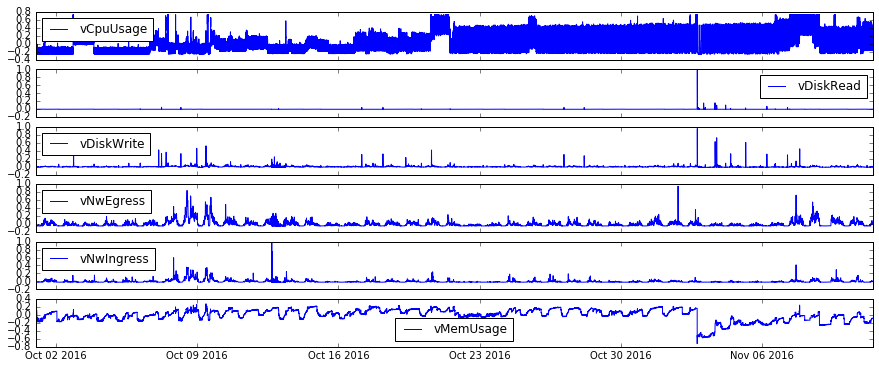

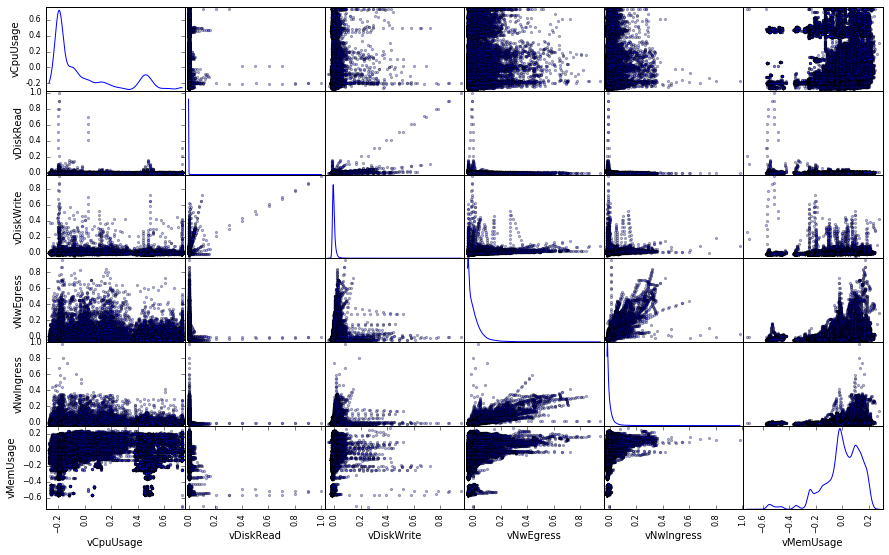

In [490]:
fig,axes=plt.subplots(X.shape[1],1,sharex=True)
xtick=X.index.to_datetime()
for i in range(X.shape[1]):
    axes[i].plot(xtick,X.ix[:,i],label=X.columns[i])
    axes[i].legend(loc='best')
    
pd.scatter_matrix(X,diagonal='kde',color='k',alpha=0.3,figsize=(15,9))

>直观感觉：1）特征之间有线性相关性；2）特征没有明显的高斯性；3）Nw I/O在已知的故障时刻变化不明显

## 3、算法比较

In [491]:
# 保留的主成分<百分比 components_percent> 
components_percent=0.85

### 3.1、PCA

In [492]:
from sklearn.decomposition import PCA
import numpy.linalg as nlg

#### 3.1.1、PCA数据探索

In [493]:
X_pca=PCA().fit(X)

In [494]:
print('correlation coefficient is:\n',X.corr())
print('\nexplained_variance is: \n',X_pca.explained_variance_)
print('\nexplained_variance ratio is: \n',X_pca.explained_variance_ratio_)

correlation coefficient is:
             vCpuUsage  vDiskRead  vDiskWrite  vNwEgress  vNwIngress  vMemUsage
vCpuUsage    1.000000  -0.002351    0.029710   0.076763    0.017744   0.040238
vDiskRead   -0.002351   1.000000    0.489968  -0.010526   -0.012408  -0.095901
vDiskWrite   0.029710   0.489968    1.000000   0.279515    0.263570   0.136716
vNwEgress    0.076763  -0.010526    0.279515   1.000000    0.834195   0.311948
vNwIngress   0.017744  -0.012408    0.263570   0.834195    1.000000   0.277348
vMemUsage    0.040238  -0.095901    0.136716   0.311948    0.277348   1.000000

explained_variance is: 
 [  6.90166490e-02   2.07657705e-02   5.08337243e-03   6.41023162e-04
   3.16248597e-04   8.44309224e-05]

explained_variance ratio is: 
 [ 0.71961685  0.21651875  0.05300287  0.00668377  0.00329743  0.00088034]


>* NwEgress,NwIngress有很强的线性相关性，DiskRead,DiskWrite的相关性也不低，另外，MemUsage与Nw I/O也都有一定的相关性，为避免各个特征的相互干扰，应通过PCA去除这种线性相关。（* 注：协方差/相关系数度量的相关性，表征的是变量间的线性相关性）    
* 通过PCA进行特征转换后，某些分量对应的特征值远小于其他值，说明该分量对于样本区分几乎无贡献，出于降维考虑可丢弃

In [495]:
#指定主成分的方差和所占的最小比例阈值为components_percent
X_pca=PCA(n_components=components_percent).fit(X)
print('负荷矩阵P：\n',X_pca.components_.T)
X_pca_T=DataFrame(X_pca.transform(X),index=X.index)
print('得分矩阵T：\n',X_pca_T.head())

负荷矩阵P：
 [[  9.99189839e-01  -3.65260896e-02]
 [ -1.67236101e-04  -7.05527465e-03]
 [  3.35514664e-03   2.97891606e-02]
 [  2.36618380e-02   1.99104182e-01]
 [  3.81860448e-03   9.04148611e-02]
 [  3.21545755e-02   9.74633958e-01]]
得分矩阵T：
                          0         1
vtime                               
2016-10-01 00:00 -0.078686  0.088554
2016-10-01 00:01 -0.078670  0.086706
2016-10-01 00:02 -0.233496  0.093372
2016-10-01 00:03 -0.198121  0.092452
2016-10-01 00:04 -0.192340  0.095468


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd574eb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd5622e48>]], dtype=object)

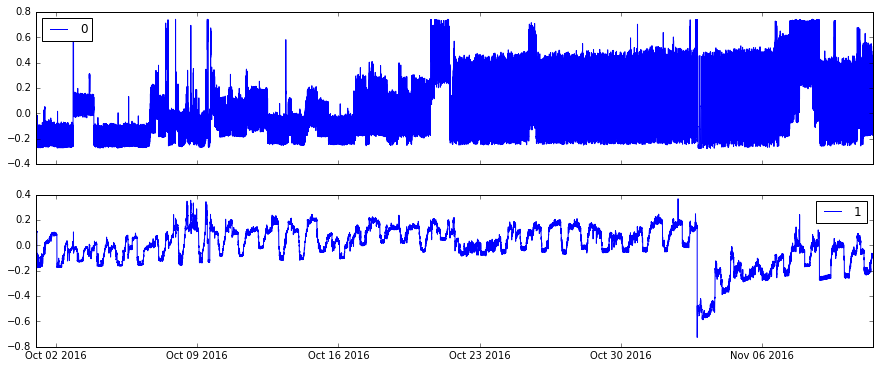

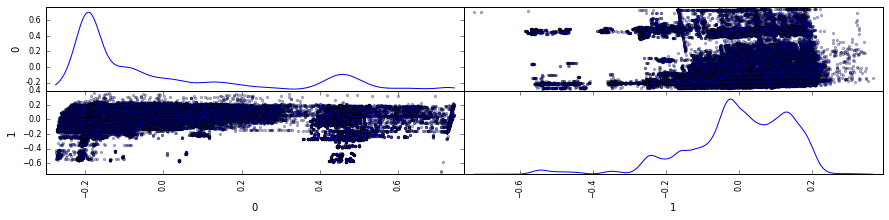

In [496]:
fig,axes=plt.subplots(X_pca_T.shape[1],1,sharex=True)
xtick=X_pca_T.index.to_datetime()
for i in range(X_pca_T.shape[1]):
    axes[i].plot(xtick,X_pca_T.ix[:,i])
    axes[i].legend(loc='best')
    
pd.scatter_matrix(X_pca_T,diagonal='kde',color='k',alpha=0.3,figsize=(15,1.5*X_pca_T.shape[1]))

> 可以看出，PCA降维后，CpuUsage和MemUsage体现为主要成分

In [497]:
print(X.ix[0].shape,X_pca.components_.shape,X_pca.explained_variance_.shape,len(X))

(6,) (2, 6) (2,) 59659


In [498]:
X_pca_recover=DataFrame(np.dot(X_pca_T,X_pca.components_),index=X.index,columns=X.columns)

> PCA的各个主元X(n sample \* m dimention) \* P(m \* A)可理解为数据的各个维度（(x1,x2,...,xm)），分别乘以一个权重，相加之后得到的,即每个新属性都是原属性的线性组合；或者理解为数据的各个样本((x1,x2,...,xn).T)，在主元空间上各个维度的投影组成。

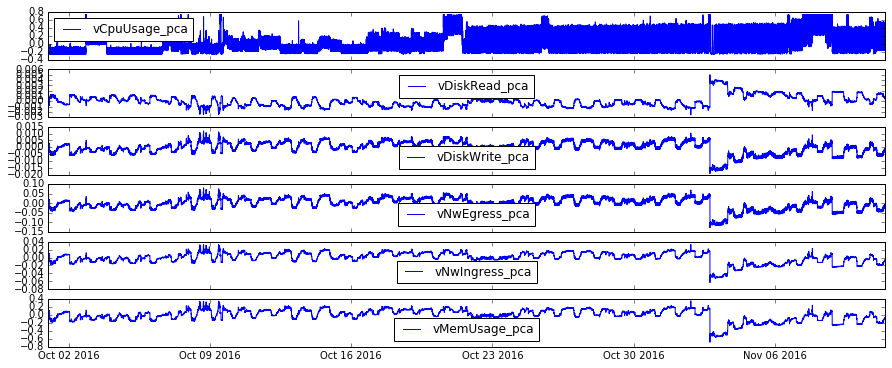

In [499]:
fig,axes=plt.subplots(X_pca_recover.shape[1],1,sharex=True)
xtick=X_pca_recover.index.to_datetime()
for i in range(X_pca_recover.shape[1]):
    axes[i].plot(xtick,X_pca_recover.ix[:,i],label=X_pca_recover.columns[i]+'_pca')
    axes[i].legend(loc='best')

In [500]:
from sklearn.metrics import r2_score

In [501]:
r2_score(X,X_pca_recover,multioutput='variance_weighted')

0.93613559465679064

> 通过R2评估拟合程度

In [502]:
#计算T2统计量
X_pca_T2=Series([np.dot(np.dot(np.dot(np.dot(X.ix[i].T,X_pca.components_.T),nlg.inv(np.diag(X_pca.explained_variance_))),X_pca.components_),X.ix[i]) for i in range(len(X))],
         index=X.index)

> 实际上是各样本得分值先平方再按特征值归一化后求和: X_pca_T2=np.sum(X_pca_T**2/X_pca.explained_variance_,axis=1)

In [503]:
#计算SPE统计量
X_pca_SPE=Series(np.sum((X-X_pca_recover)**2,axis=1),index=X.index)

> T2实际表征为主元空间中样本点与原点间的马氏距离，而SPE则采用的是欧式距离。原因是人们认为留在残差空间的信息主要是噪声，而由于噪声的随机性较强，其方差是没有必要考虑的，所以在残差空间中采用欧式距离而非马氏距离作为监控指标。

#### 3.1.2、采用置信度确定阈值

In [504]:
# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_pca_T2_pdf_step=(X_pca_T2.max()-X_pca_T2.median())/100
X_pca_SPE_pdf_step=(X_pca_SPE.max()-X_pca_SPE.median())/100

##### option1:使用scikit learn 的KDE API估计概率密度

In [505]:
from sklearn.neighbors import KernelDensity

In [506]:
X_pca_T2_scikit_kde=KernelDensity().fit(X_pca_T2.reshape(-1,1)) #reshape(-1,1)是API要求,否则视为一个点，概率密度就无从谈起了
X_pca_SPE_scikit_kde=KernelDensity().fit(X_pca_SPE.reshape(-1,1))

In [507]:
#比较耗时，先注掉
#plt.plot(np.exp(X_pca_T2_scikit_kde.score_samples(X_pca_T2.sort_values().reshape(-1,1))))

In [508]:
#比较耗时，先注掉
#plt.plot(np.exp(X_pca_T2_scikit_kde.score_samples(np.linspace(0,50,1000).reshape(-1,1))))

In [509]:
from scipy.integrate import quad

In [510]:
def X_pca_T2_scikit_kde_func(x):
    return np.exp(X_pca_T2_scikit_kde.score_samples(x))

def X_pca_SPE_scikit_kde_func(x):
    return np.exp(X_pca_SPE_scikit_kde.score_samples(x))

def get_threshold_of_scikit_kde(kde,start,step=1,confidence=0.997):
    """get threshold by confidence"""
    i = start
    cumsum = quad(kde,-np.inf, start)[0]
    while True:
        if cumsum >= confidence:
            break
        cumsum = cumsum + quad(kde,i, i+step)[0]
        i = i + step
        
    return i

get_threshold_of_scikit_kde(X_pca_T2_scikit_kde_func,X_pca_T2.min(),step=X_pca_T2_pdf_step)

17.049503816287093

##### option2:使用scipy 的KDE API估计概率密度

In [511]:
from scipy import stats

In [512]:
def my_kde_bandwidth(obj, fac=1./2):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

X_pca_T2_scipy_kde=stats.gaussian_kde(X_pca_T2, bw_method=my_kde_bandwidth)
X_pca_SPE_scipy_kde=stats.gaussian_kde(X_pca_SPE, bw_method=my_kde_bandwidth)

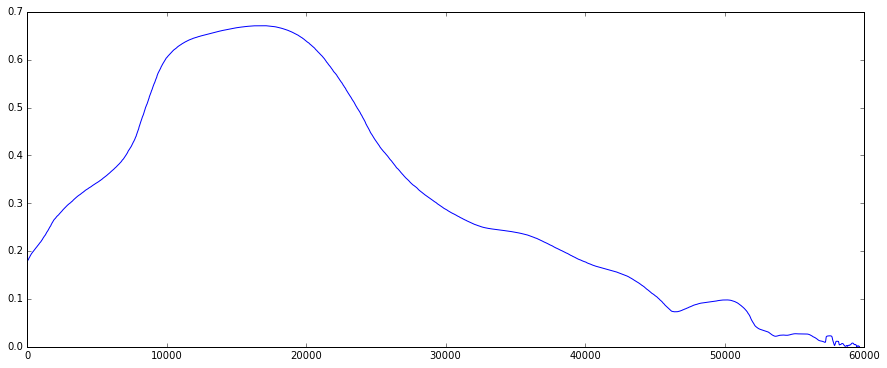

In [513]:
plt.plot(X_pca_T2_scipy_kde.pdf(X_pca_T2.sort_values()))

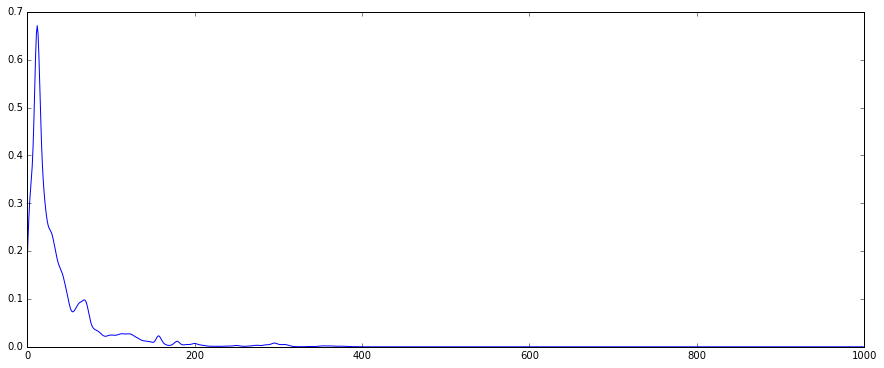

In [514]:
plt.plot(X_pca_T2_scipy_kde.pdf(np.linspace(0,50,1000)))

In [515]:
def get_threshold_of_scipy_kde(kde,start,step=1,confidence=0.997):
    """get threshold by confidence"""
    i = start
    cumsum = kde.integrate_box_1d(-np.inf, start)
    while True:
        if cumsum >= confidence:
            break
        cumsum = cumsum + kde.integrate_box_1d(i, i+step)
        i = i + step
        
    return i

get_threshold_of_scipy_kde(X_pca_T2_scipy_kde,X_pca_T2.min(),step=X_pca_T2_pdf_step)

17.365228235825306

> 采用scikit-learn与scipy均可通过KDE进行阈值的确定，结果基本一致。但scipy无论是使用便捷性还是计算效率（ms级）都比scikit-learn（s级）要好，故后续使用scipy来进行计算。

In [516]:
X_pca_T2_threshold=get_threshold_of_scipy_kde(X_pca_T2_scipy_kde,X_pca_T2.min(),step=X_pca_T2_pdf_step,confidence=0.997)
X_pca_SPE_threshold=get_threshold_of_scipy_kde(X_pca_SPE_scipy_kde,X_pca_SPE.min(),step=X_pca_SPE_pdf_step,confidence=0.997)

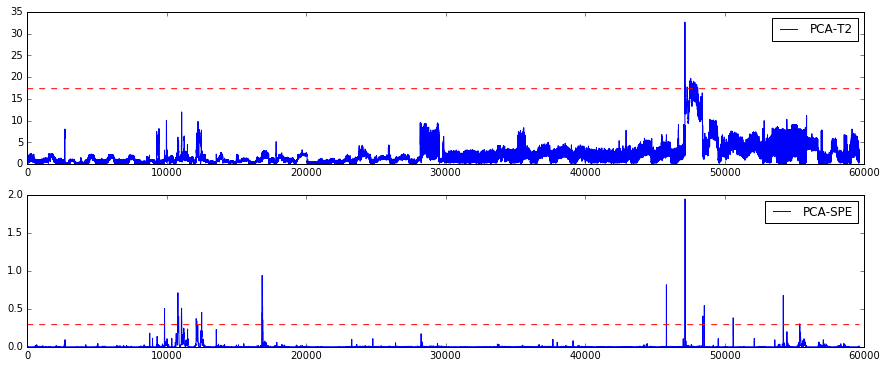

In [517]:
plt.subplot(211)
plt.plot(X_pca_T2.values,label='PCA-T2')
plt.plot(X_pca_T2_threshold*np.ones(len(X_pca_T2)),'r--')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(X_pca_SPE.values,label='PCA-SPE')
plt.plot(X_pca_SPE_threshold*np.ones(len(X_pca_SPE)),'r--')
plt.legend(loc='best')

#### 3.1.3、检测到的异常时刻

##### T2检测

In [518]:
X_pca_T2_anomaly=X_pca_T2[X_pca_T2>X_pca_T2_threshold].index
#10min聚合，注意第一个元素的处理
indice=pd.Series([True]+list(np.diff(X_pca_T2_anomaly)>10))
X_pca_T2_anomaly_plot=Series(np.ones(len(X_pca_T2_anomaly[indice])),index=X_pca_T2_anomaly[indice])
X_pca_T2_anomaly_idx=X_pca_T2_anomaly[indice]
print(X_pca_T2_anomaly_idx)

PeriodIndex(['2016-11-02 18:29', '2016-11-02 18:55', '2016-11-02 21:10',
             '2016-11-03 00:19', '2016-11-03 01:21', '2016-11-03 01:55',
             '2016-11-03 02:17', '2016-11-03 03:25', '2016-11-03 03:59',
             '2016-11-03 04:32', '2016-11-03 05:07', '2016-11-03 05:40',
             '2016-11-03 06:14', '2016-11-03 06:48', '2016-11-03 07:22',
             '2016-11-03 07:55', '2016-11-03 08:29', '2016-11-03 09:02',
             '2016-11-03 09:38'],
            dtype='int64', name='vtime', freq='T')


##### SPE检测

In [519]:
X_pca_SPE_anomaly=X_pca_SPE[X_pca_SPE>X_pca_SPE_threshold].index
indice=pd.Series([True]+list(np.diff(X_pca_SPE_anomaly)>10))
X_pca_SPE_anomaly_plot=Series(np.ones(len(X_pca_SPE_anomaly[indice])),index=X_pca_SPE_anomaly[indice])
X_pca_SPE_anomaly_idx=X_pca_SPE_anomaly[indice]
print(X_pca_SPE_anomaly_idx)

PeriodIndex(['2016-10-07 20:01', '2016-10-08 11:41', '2016-10-08 12:42',
             '2016-10-08 16:12', '2016-10-09 09:54', '2016-10-09 10:34',
             '2016-10-09 16:21', '2016-10-12 16:45', '2016-10-12 17:00',
             '2016-10-12 17:13', '2016-11-01 19:41', '2016-11-02 18:32',
             '2016-11-03 15:48', '2016-11-03 17:37', '2016-11-05 04:09',
             '2016-11-07 15:57', '2016-11-08 11:42'],
            dtype='int64', name='vtime', freq='T')


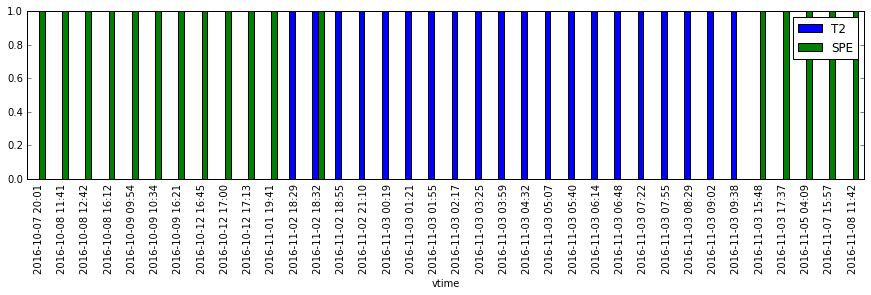

In [520]:
anomaly_plot=pd.concat([X_pca_T2_anomaly_plot,X_pca_SPE_anomaly_plot],axis=1)
anomaly_plot.columns=['T2','SPE']

#以SPE为基准，10min聚合观察
for i in range(1,len(anomaly_plot)-1):
    if (anomaly_plot.index[i]-anomaly_plot.index[i-1])<=10:
        anomaly_plot.ix[i,:]=1
        
anomaly_plot.plot(kind='bar',figsize=(15, 3))

> * T2一般体现的是系统性变化，SPE一般体现的是非系统性变化，也就是说，SPE更能反映异常特征。
> * 在基于PCA的故障检测中，一般会有四种情况:(l)T2和SPE统计量都不超过控制限;(2)T2正常，但SPE超出控制限;(3)T2超出控制限，但SPE正常;(4)T2和SPE都超出控制限。一般认为(2)和(4)为故障，另两种正常。    
> * 考虑到采样和插值误差，可以将SPE 10min范围内出现的T2视为同时出现

#### 3.1.4 变量贡献图分析

> 参考文献《Double-step block division plant-wide fault detection and diagnosis based on variable distributions and relevant features》

In [521]:
#通过generator输出T2观察结果
X_pca_T2_idx=iter(X_pca_T2_anomaly_idx)

2016-11-02 18:29


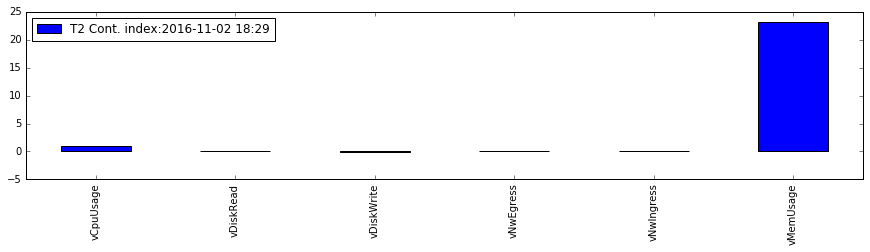

In [522]:
try:
    #T2贡献
    ##以T2最大值点进行计算
    idx=X_pca_T2_idx.__next__()
    print(idx)
    ##获取x的得分
    x_t=X_pca_T.ix[idx]
    ##确定out-of-control的主成分
    x_t_indice=(x_t**2/X_pca.explained_variance_)>(X_pca_T2.ix[idx]/X_pca.n_components_)
    ##计算
    X_T2_cont=Series(np.zeros(X.shape[1]),index=X.columns)
    for j in range(X.shape[1]):
        for i in range(X_pca.n_components_):
            if x_t_indice[i]==True:
                X_T2_cont[j]=X_T2_cont[j]+x_t[i]/X_pca.explained_variance_[i]*X_pca.components_[i,j]*X.ix[idx,j]
    ##绘图
    X_T2_cont.plot(kind='bar',figsize=(15,3),label='T2 Cont. index:'+str(idx))
    plt.legend(loc='best')

except StopIteration:
    print('output over!')

In [523]:
#通过generator输出SPE观察结果
X_pca_SPE_idx=iter(X_pca_SPE_anomaly_idx)

2016-10-07 20:01


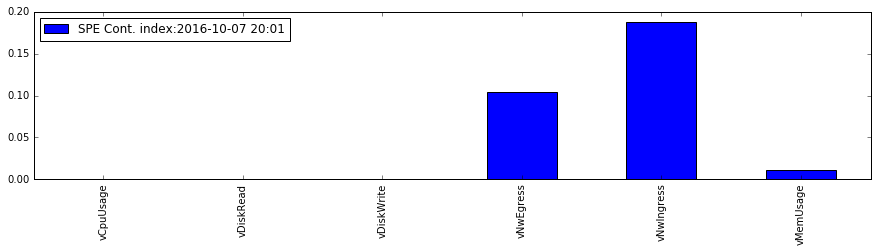

In [524]:
try:
    #SPE贡献
    ##以SPE最大值点进行计算
    idx=X_pca_SPE_idx.__next__()
    print(idx)
    X_SPE_cont=(X.ix[idx]-X_pca_recover.ix[idx])**2
    ##绘图
    X_SPE_cont.plot(kind='bar',figsize=(15,3),label='SPE Cont. index:'+str(idx))
    plt.legend(loc='best')
    
except StopIteration:
    print('output over!')

### 3.2、ICA

> PCA仅采用一阶和二阶矩来描述算法过程，因此一般假设过程变量服从正态分布(二阶统计量便足以描述高斯信号)，但实际工业过程观测到的数据的分布情况往往不服从多元正态分布，采用传统的PCA方法，就可能会造成故障的严重误报和漏报。利用信号的高阶统计信息，将混合信号分解成相互独立的非高斯成分，从而引入ICA算法。

In [525]:
from sklearn.decomposition import FastICA

#### 3.2.1、确定独立成分个数

##### option1:使用混合矩阵能量占比确定独立成分

In [526]:
def get_ica_components(X,contribution=components_percent):
    X_ica=FastICA(n_components=len(X.columns)).fit(X)    
    
    L2=Series(np.sum(X_ica.mixing_**2,axis=0))
    L2.sort_values(ascending=False,inplace=True)
    
    X_S=DataFrame(X_ica.transform(X))
    X_ica_mixing_=DataFrame(X_ica.mixing_)

    L2.drop(L2.index[L2.cumsum()/L2.sum()>=contribution][1:],inplace=True)

    return X_S.reindex(columns=L2.index).values,X_ica_mixing_.reindex(columns=L2.index).values,X_ica.mean_,len(L2)

In [527]:
X_S_,X_ica_mixing_,X_ica_mean_,n=get_ica_components(X)
print(X.shape,X_S_.shape,X_ica_mixing_.shape,n)

(59659, 6) (59659, 2) (6, 2) 2


##### option2:使用R2统计量确定独立成分个数

In [528]:
def get_ica_n_components(X,r2_score_value=components_percent):
    for i in np.arange(len(X.columns)-1):
        X_ica=FastICA(n_components=len(X.columns)-i-1).fit(X)
        X_S=X_ica.transform(X)
        if r2_score(X, np.dot(X_S,X_ica.mixing_.T)+X_ica.mean_,multioutput='variance_weighted') < r2_score_value:
            break;
    return len(X.columns)-i

n=get_ica_n_components(X)
n

2

##### option3：使用PCA的主成分个数

In [529]:
n=X_pca.n_components_
n

2

#### 3.2.2、ICA数据探索

In [530]:
X_ica=FastICA(n_components=n).fit(X)
X_S_=X_ica.transform(X)

In [531]:
#各种算法的变量统一，便于后续计算
X_ica_mixing_=X_ica.mixing_
X_ica_mean_=X_ica.mean_

In [532]:
print(X.shape,X_S_.shape,X_ica_mixing_.shape,X_ica.components_.shape)

(59659, 6) (59659, 2) (6, 2) (2, 6)


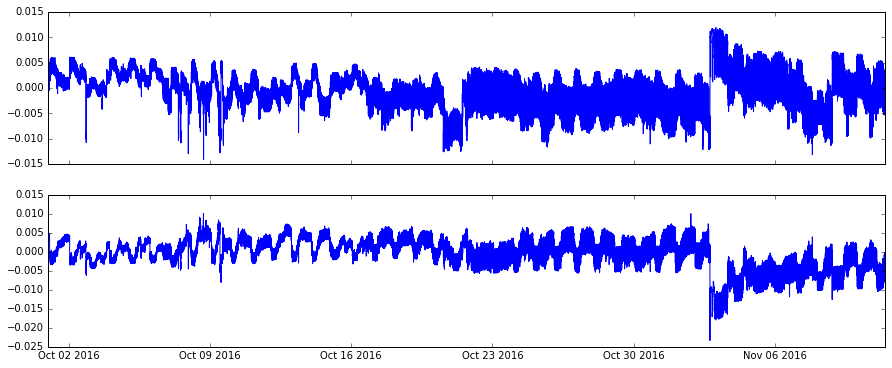

In [533]:
#观察独立成分
fig,axes=plt.subplots(n,1,sharex=True)
xtick=X.index.to_datetime()
for i in range(n):
    axes[i].plot(xtick,X_S_[:,i])

> 从分解出的独立成分可以看出，与原数据有一定的对应，这与ICA算法原理有关，因为ICA会先利用PCA进行白化预处理，使得原来所求的解混合矩阵退化成一个正交阵，自由度降为N*（N-1）/2，减少了ICA的工作量。而由于PCA本身具有降维功能，当观测信号的个数大于源信号个数时，白化也具有将观测信号数目降到与源信号维数相同的功效。

In [534]:
X_ica_recover=DataFrame(np.dot(X_S_,X_ica_mixing_.T)+X_ica_mean_,index=X.index,columns=X.columns)

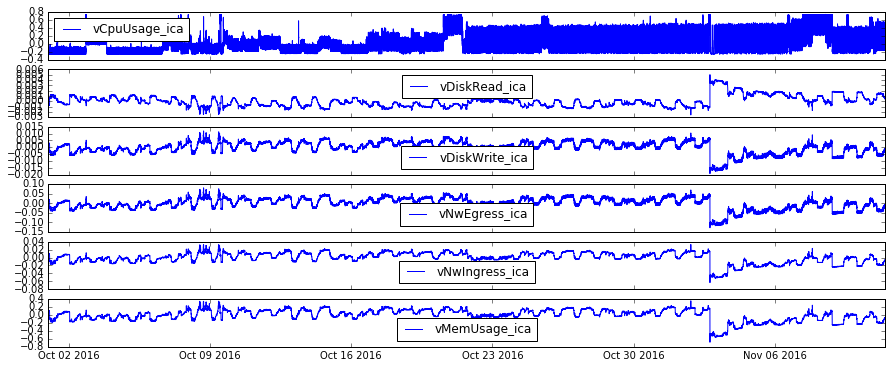

In [535]:
fig,axes=plt.subplots(X_ica_recover.shape[1],1,sharex=True)
xtick=X_ica_recover.index.to_datetime()
for i in range(X_ica_recover.shape[1]):
    axes[i].plot(xtick,X_ica_recover.ix[:,i],label=X_ica_recover.columns[i]+'_ica')
    axes[i].legend(loc='best')

In [536]:
r2_score(X,X_ica_recover,multioutput='variance_weighted')

0.93613559465679086

In [537]:
#计算T2统计量
X_ica_T2=Series(np.sum(X_S_**2,axis=1),index=X.index)

In [538]:
#计算SPE统计量
X_ica_SPE=Series(np.sum((X-X_ica_recover)**2,axis=1),index=X.index)

#### 3.2.3、采用置信度确定阈值

In [539]:
# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_ica_T2_pdf_step=(X_ica_T2.max()-X_ica_T2.median())/100
X_ica_SPE_pdf_step=(X_ica_SPE.max()-X_ica_SPE.median())/100

In [540]:
X_ica_T2_scipy_kde=stats.gaussian_kde(X_ica_T2, bw_method=my_kde_bandwidth)
X_ica_SPE_scipy_kde=stats.gaussian_kde(X_ica_SPE, bw_method=my_kde_bandwidth)
X_ica_T2_threshold=get_threshold_of_scipy_kde(X_ica_T2_scipy_kde,X_ica_T2.min(),step=X_ica_T2_pdf_step,confidence=0.997)
X_ica_SPE_threshold=get_threshold_of_scipy_kde(X_ica_SPE_scipy_kde,X_ica_SPE.min(),step=X_ica_SPE_pdf_step,confidence=0.997)

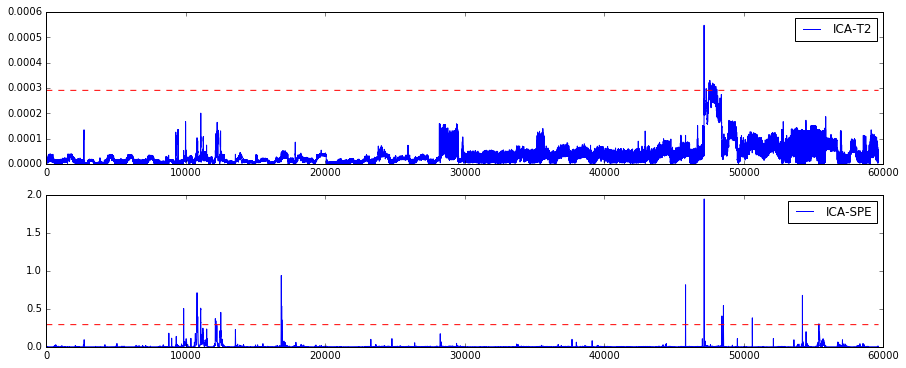

In [541]:
plt.subplot(211)
plt.plot(X_ica_T2.values,label='ICA-T2')
plt.plot(X_ica_T2_threshold*np.ones(len(X_ica_T2)),'r--')
plt.legend(loc='best')

plt.subplot(212)
plt.plot(X_ica_SPE.values,label='ICA-SPE')
plt.plot(X_ica_SPE_threshold*np.ones(len(X_ica_SPE)),'r--')
plt.legend(loc='best')

#### 3.2.4、检测到的异常时刻

##### T2检测

In [542]:
X_ica_T2_anomaly=X_ica_T2[X_ica_T2>X_ica_T2_threshold].index
#10min聚合，注意第一个元素的处理
indice=pd.Series([True]+list(np.diff(X_ica_T2_anomaly)>10))
X_ica_T2_anomaly_plot=Series(np.ones(len(X_ica_T2_anomaly[indice])),index=X_ica_T2_anomaly[indice])

X_ica_T2_anomaly_start=X_ica_T2_anomaly[indice].tolist()
X_ica_T2_anomaly_end=X_ica_T2_anomaly[indice.shift(-1).fillna(False)].tolist()
X_ica_T2_anomaly_end.append(X_ica_T2_anomaly[-1])

print('anomal periods detected by T2 metric are: ')
for each in zip(X_ica_T2_anomaly_start,X_ica_T2_anomaly_end):    
    print(each)

anomal periods detected by T2 metric are: 
(Period('2016-11-02 18:29', 'T'), Period('2016-11-02 18:31', 'T'))
(Period('2016-11-02 18:55', 'T'), Period('2016-11-02 19:18', 'T'))
(Period('2016-11-02 21:10', 'T'), Period('2016-11-02 21:11', 'T'))
(Period('2016-11-03 00:19', 'T'), Period('2016-11-03 00:27', 'T'))
(Period('2016-11-03 01:21', 'T'), Period('2016-11-03 01:30', 'T'))
(Period('2016-11-03 01:55', 'T'), Period('2016-11-03 02:03', 'T'))
(Period('2016-11-03 02:17', 'T'), Period('2016-11-03 02:26', 'T'))
(Period('2016-11-03 03:25', 'T'), Period('2016-11-03 03:34', 'T'))
(Period('2016-11-03 03:59', 'T'), Period('2016-11-03 04:08', 'T'))
(Period('2016-11-03 04:32', 'T'), Period('2016-11-03 04:41', 'T'))
(Period('2016-11-03 05:07', 'T'), Period('2016-11-03 05:16', 'T'))
(Period('2016-11-03 05:40', 'T'), Period('2016-11-03 05:49', 'T'))
(Period('2016-11-03 06:14', 'T'), Period('2016-11-03 06:23', 'T'))
(Period('2016-11-03 06:48', 'T'), Period('2016-11-03 06:57', 'T'))
(Period('2016-11-03

##### SPE检测

In [543]:
X_ica_SPE_anomaly=X_ica_SPE[X_ica_SPE>X_ica_SPE_threshold].index
indice=pd.Series([True]+list(np.diff(X_ica_SPE_anomaly)>10))
X_ica_SPE_anomaly_plot=Series(np.ones(len(X_ica_SPE_anomaly[indice])),index=X_ica_SPE_anomaly[indice])

X_ica_SPE_anomaly_start=X_ica_SPE_anomaly[indice].tolist()
X_ica_SPE_anomaly_end=X_ica_SPE_anomaly[indice.shift(-1).fillna(False)].tolist()
X_ica_SPE_anomaly_end.append(X_ica_SPE_anomaly[-1])

print('anomal periods detected by SPE metric are: ')
for each in zip(X_ica_SPE_anomaly_start,X_ica_SPE_anomaly_end):
    print(each)

anomal periods detected by SPE metric are: 
(Period('2016-10-07 20:01', 'T'), Period('2016-10-07 20:06', 'T'))
(Period('2016-10-08 11:41', 'T'), Period('2016-10-08 12:11', 'T'))
(Period('2016-10-08 12:42', 'T'), Period('2016-10-08 13:00', 'T'))
(Period('2016-10-08 16:12', 'T'), Period('2016-10-08 16:40', 'T'))
(Period('2016-10-09 09:54', 'T'), Period('2016-10-09 10:08', 'T'))
(Period('2016-10-09 10:34', 'T'), Period('2016-10-09 10:36', 'T'))
(Period('2016-10-09 16:21', 'T'), Period('2016-10-09 16:29', 'T'))
(Period('2016-10-12 16:45', 'T'), Period('2016-10-12 16:46', 'T'))
(Period('2016-10-12 17:00', 'T'), Period('2016-10-12 17:00', 'T'))
(Period('2016-10-12 17:13', 'T'), Period('2016-10-12 17:21', 'T'))
(Period('2016-11-01 19:41', 'T'), Period('2016-11-01 19:49', 'T'))
(Period('2016-11-02 18:32', 'T'), Period('2016-11-02 18:44', 'T'))
(Period('2016-11-03 15:48', 'T'), Period('2016-11-03 15:50', 'T'))
(Period('2016-11-03 17:37', 'T'), Period('2016-11-03 17:41', 'T'))
(Period('2016-11-0

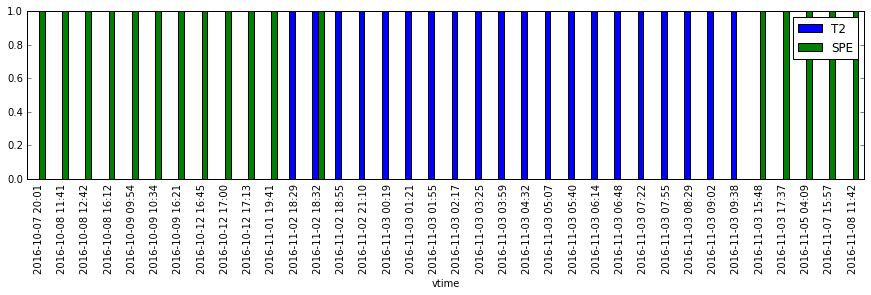

In [544]:
anomaly_plot=pd.concat([X_ica_T2_anomaly_plot,X_ica_SPE_anomaly_plot],axis=1)
anomaly_plot.columns=['T2','SPE']

#以SPE为基准，10min聚合观察
for i in range(1,len(anomaly_plot)-1):
    if (anomaly_plot.index[i]-anomaly_plot.index[i-1])<=10:
        anomaly_plot.ix[i,:]=1
        
anomaly_plot.plot(kind='bar',figsize=(15, 3))

> ICA检测效果与PCA基本一致。应该与PCA降维后的数据特性有关（比如基本符合ICA的目标：独立，非高斯），经ICA分解后的独立分量并没有显著变化。

### 3.3、LLE

In [545]:
from sklearn import manifold

#### 3.3.1、LLE数据探索

> 通过3D降维，观察图形的流行特征

In [546]:
#降到3维观察
X_lle_embed=manifold.LocallyLinearEmbedding(n_neighbors =10, n_components=3).fit_transform(X)

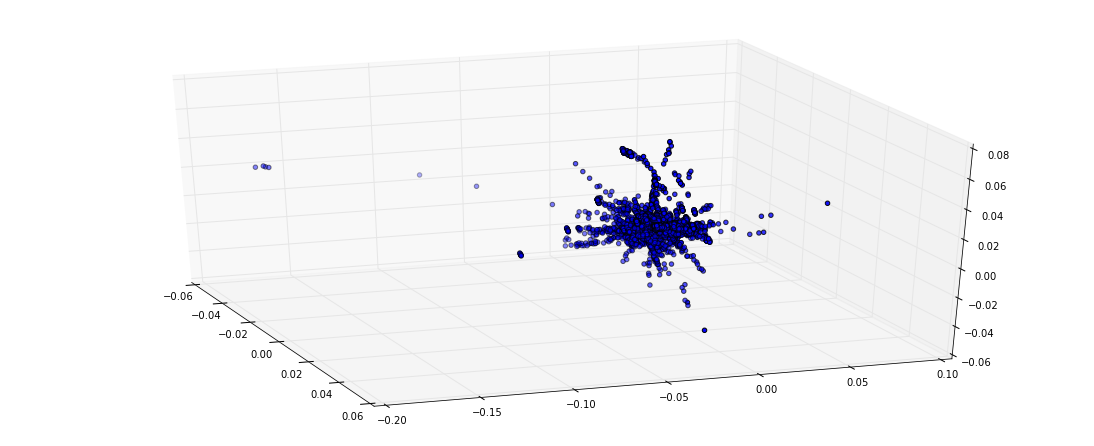

In [547]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, elev=30, azim=-20)
ax.scatter(X_lle_embed[:,0], X_lle_embed[:,1], X_lle_embed[:,2], marker='o', cmap=plt.cm.rainbow)

> LLE具有不受数据分布约束的优势，能够较好的保留数据的局部结构信息，可降维到3D图形观察数据特征。图示并不具有典型的流行结构，因此采用流行算法的必要性不高。而且由于LLE的k，d参数目前没有较好的手段确定，且算法本身计算复杂度也比较高，因此不推荐使用。这里出于研究目的，仍给出LLE的算法参考。

#### 3.3.2、LLE数据处理

In [548]:
X_lle_embed=manifold.LocallyLinearEmbedding(n_neighbors =10, n_components=5).fit_transform(X)

In [549]:
X_lle_embed_mean=X_lle_embed.mean(axis=0)
X_lle_embed_mean

array([  2.18663648e-05,   3.29727827e-03,  -7.98554144e-04,
         7.71295635e-04,  -3.87174829e-04])

In [550]:
X_lle_vi=nlg.inv(np.cov(X_lle_embed.T))
X_lle_vi

array([[  5.96643291e+04,   9.54379737e+02,  -2.31137269e+02,
          2.23247437e+02,  -1.12065704e+02],
       [  9.54379737e+02,   2.03571064e+05,  -3.48537080e+04,
          3.36639826e+04,  -1.68986393e+04],
       [ -2.31137269e+02,  -3.48537080e+04,   6.80990749e+04,
         -8.15294028e+03,   4.09261134e+03],
       [  2.23247437e+02,   3.36639826e+04,  -8.15294028e+03,
          6.75326410e+04,  -3.95291075e+03],
       [ -1.12065704e+02,  -1.68986393e+04,   4.09261134e+03,
         -3.95291075e+03,   6.16422813e+04]])

In [551]:
#计算的是到均值的马氏距离
X_lle_T2=Series([np.dot(np.dot(X_lle_embed[i]-X_lle_embed_mean,X_lle_vi),X_lle_embed[i]-X_lle_embed_mean)
                 for i in np.arange(len(X_lle_embed))],index=X.index)

In [552]:
X_lle_T2.describe()

count    59659.000000
mean         4.999916
std         40.349114
min          0.002908
25%          0.331293
50%          1.038421
75%          2.056317
max       2692.335545
dtype: float64

In [553]:
# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_lle_T2_pdf_step=(X_lle_T2.max()-X_lle_T2.median())/100

In [554]:
X_lle_T2_scipy_kde=stats.gaussian_kde(X_lle_T2, bw_method=my_kde_bandwidth)
X_lle_T2_threshold=get_threshold_of_scipy_kde(X_lle_T2_scipy_kde,X_lle_T2.min(),step=X_lle_T2_pdf_step,confidence=0.997)

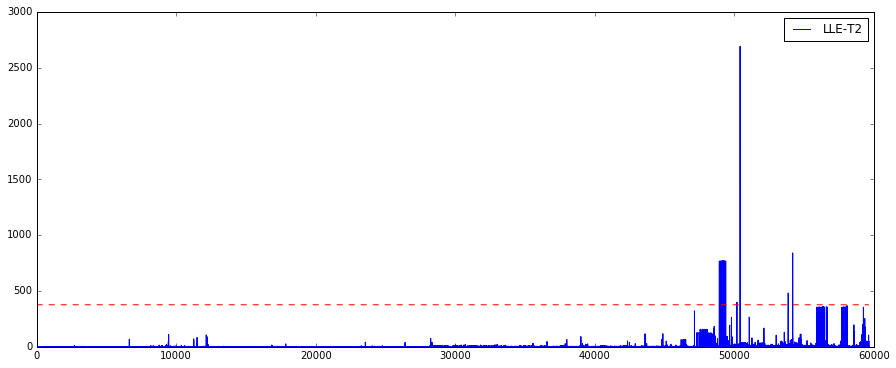

In [555]:
plt.plot(X_lle_T2.values,label='LLE-T2')
plt.plot(X_lle_T2_threshold*np.ones(len(X_lle_T2)),'r--')
plt.legend(loc='best')

#### 3.3.3、检测到的异常时刻

In [556]:
X_lle_T2_anomaly=X_lle_T2[X_lle_T2>get_threshold_of_scipy_kde(X_lle_T2_scipy_kde,X_lle_T2.min(),step=X_lle_T2_pdf_step,confidence=0.997)].index
#10min聚合，注意第一个元素的处理
indice=pd.Series([True]+list(np.diff(X_lle_T2_anomaly)>10))
X_lle_T2_anomaly[indice]

PeriodIndex(['2016-11-04 00:12', '2016-11-04 01:16', '2016-11-04 02:12',
             '2016-11-04 03:19', '2016-11-04 03:53', '2016-11-04 04:59',
             '2016-11-04 06:06', '2016-11-04 07:45', '2016-11-04 21:16',
             '2016-11-05 00:59', '2016-11-07 10:31', '2016-11-07 15:52'],
            dtype='int64', name='vtime', freq='T')

> T2误检时刻较多。由于LLE算法是非线性算法（NPE是LLE的线性近似），无法转换到原始数据空间，因此不能计算SPE。

### 3.4、不降维，直接采用马氏距离平方进行度量

> 由于特征较少，出于研究目的，本小节给出不降维的异常检测结果用于对比

In [557]:
from scipy import spatial

In [558]:
#计算每个样本到均值的马氏距离
X_vi=nlg.inv(np.cov(X.T))
X_mahalanobis_dist=[spatial.distance.pdist(np.array([X.ix[i],X_mean]),metric='mahalanobis',VI=X_vi)[0] for i in np.arange(len(X))]

In [559]:
X_mahalanobis_dist2=Series(np.square(X_mahalanobis_dist),index=X.index)

In [560]:
# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_mahalanobis_dist2_pdf_step=(X_mahalanobis_dist2.max()-X_mahalanobis_dist2.median())/100

In [561]:
X_mahalanobis_dist2_scipy_kde=stats.gaussian_kde(X_mahalanobis_dist2, bw_method=my_kde_bandwidth)

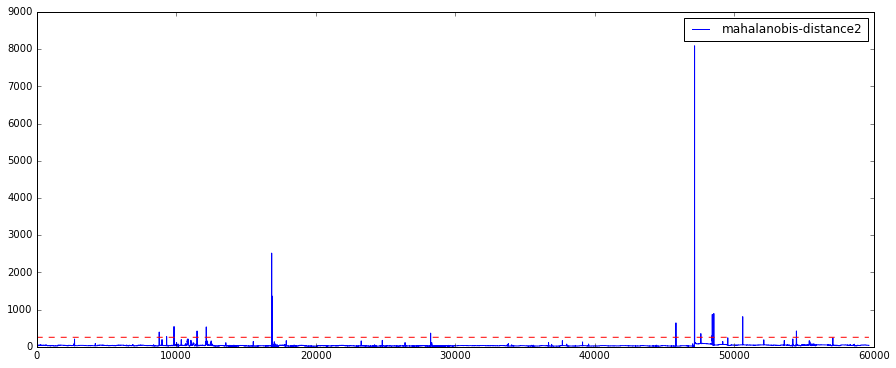

In [562]:
plt.plot(X_mahalanobis_dist2.values,label='mahalanobis-distance2')
plt.plot(get_threshold_of_scipy_kde(X_mahalanobis_dist2_scipy_kde,X_mahalanobis_dist2.min(),step=X_mahalanobis_dist2_pdf_step,confidence=0.997)
         *np.ones(len(X_mahalanobis_dist2)),'r--')
plt.legend(loc='best')

#### 检测到的异常时刻

In [563]:
X_mahalanobis_dist2_anomaly=X_mahalanobis_dist2[X_mahalanobis_dist2>get_threshold_of_scipy_kde(X_mahalanobis_dist2_scipy_kde,X_mahalanobis_dist2.min(),step=X_mahalanobis_dist2_pdf_step,confidence=0.997)].index
#10min聚合，注意第一个元素的处理
indice=pd.Series([True]+list(np.diff(X_mahalanobis_dist2_anomaly)>10))
X_mahalanobis_dist2_anomaly[indice]

PeriodIndex(['2016-10-07 02:21', '2016-10-07 11:14', '2016-10-07 20:01',
             '2016-10-08 23:33', '2016-10-09 10:33', '2016-10-12 16:44',
             '2016-10-20 14:39', '2016-11-01 19:41', '2016-11-02 18:30',
             '2016-11-03 02:06', '2016-11-03 15:38', '2016-11-03 17:35',
             '2016-11-05 04:06', '2016-11-07 20:17'],
            dtype='int64', name='vtime', freq='T')

## 4、相关性变化分析

> 某些故障发生时会出现过程变量均值、方差不变而过程变量间相关性发生改变的情况，对此操作维护人员凭肉眼比较难以察觉。相关性变化分析是通过分析每个变量之间的相关性变化来进行故障检测。首先采用移动窗的方法对数据进行处理，形成的相关性矩阵中需要去除自相关的部分，然后再对这个数据矩阵进行处理。

### 4.1、形成待分析的相关性矩阵

In [564]:
# DataFrame X(n*m),n:sample;m:dimention
def get_multiindex(X):
    dim=int(X.shape[1]*(X.shape[1]-1)/2)
    multiindex=[0]*dim
    count=0
    for j in range(X.shape[1]):
        for k in range(j+1,X.shape[1]):
            multiindex[count]=(X.columns[j],X.columns[k])
            count=count+1
    return multiindex

#默认窗口win个点，每次移动的步长是step，重叠部分为win-step
def get_X_cov_values_by_win(X,win,step):
    irow=int(X.shape[0]/step)
    if X.shape[0]-irow*step>0:
        irow=irow+1
    icolumn=int(X.shape[1]*(X.shape[1]-1)/2)    
    X_cov_values = np.empty([irow, icolumn])
    
    for i in range(irow):    
        istep=i*step
        X_win=X[istep:istep+win] if (istep+win)<X.shape[0] else X[i:]
        
        X_win_cov=X_win.cov().fillna(0)
        count=0
        for j in range(len(X_win_cov)):
            for k in range(j+1,len(X_win_cov)):
                X_cov_values[i,count]=X_win_cov.ix[j,k]
                count=count+1    
    
    return X_cov_values            

> 将X_win.cov()修改为X_win.corr()，可将metric从协方差调整为相关系数，协方差衡量两个变量间的方差变化幅度，而相关系数衡量两个变量间的变化关系。对于相关系数的应用场景，举个例子，物联网领域中，如果一组相关的传感器中，某个传感器失效了，那么它与其他传感器的相关关系就会发生改变，此时，通过对相关关系的变化分析就能感知。而对于本文所处的问题场景，检测指标来自系统自身而非传感器，一般不会出现某个监测指标失效而其他正常的情况，因此个人理解采用相关系数并不合适。

In [565]:
win=100
step=60
X_win_cov_values = get_X_cov_values_by_win(X,win,step)
X_win_cov_multiindex_1,X_win_cov_multiindex_2=zip(*get_multiindex(X))
X_win_cov=DataFrame(X_win_cov_values,index=X.index[::step],columns=[list(X_win_cov_multiindex_1),list(X_win_cov_multiindex_2)]) 
X_win_cov.head()

vCpuUsage                                        \
                     vDiskRead    vDiskWrite vNwEgress    vNwIngress   
vtime                                                                  
2016-10-01 00:00  1.315660e-06 -2.317722e-05  0.000016  5.613985e-06   
2016-10-01 01:00  4.580939e-07 -3.146613e-05  0.000057  1.648636e-05   
2016-10-01 02:00  0.000000e+00 -2.101424e-05 -0.000036 -2.106031e-05   
2016-10-01 03:00  0.000000e+00 -1.218351e-05 -0.000031 -1.163763e-05   
2016-10-01 04:00  0.000000e+00 -4.151789e-07  0.000004  6.162533e-07   

                               vDiskRead                                    \
                 vMemUsage    vDiskWrite vNwEgress    vNwIngress vMemUsage   
vtime                                                                        
2016-10-01 00:00 -0.000064  5.903984e-07  0.000002  4.442665e-07  0.000003   
2016-10-01 01:00 -0.000010  3.974051e-07  0.000004  1.371245e-06  0.000020   
2016-10-01 02:00  0.000239  0.000000e+00  0.000000  0.000000e+00  0.000000   
2016-10-01 03:00 -0.000082  0.000000e+00  0.000000  0.000000e+00  0.000000   
2016-10-01 04:00  0.000072  0.000000e+00  0.000000  0.000000e+00  0.000000   

                 vDiskWrite                          vNwEgress            \
                  vNwEgress    vNwIngress vMemUsage vNwIngress vMemUsage   
vtime                                                                      
2016-10-01 00:00   0.000069  3.332724e-05 -0.000046   0.000135  0.000313   
2016-10-01 01:00   0.000017  5.450976e-06  0.000064   0.000068  0.001171   
2016-10-01 02:00   0.000017  5.529222e-06  0.000040   0.000021  0.000159   
2016-10-01 03:00   0.000021  7.086318e-06  0.000064   0.000025  0.000183   
2016-10-01 04:00   0.000005  9.956972e-07  0.000022   0.000003  0.000059   

                 vNwIngress  
                  vMemUsage  
vtime                        
2016-10-01 00:00   0.000121  
2016-10-01 01:00   0.000433  
2016-10-01 02:00   0.000044  
2016-10-01 03:00   0.000064  
2016-10-01 04:00   0.000013

### 4.2、PCA

anomal periods detected by T2 metric are: 
(Period('2016-10-08 15:00', 'T'), Period('2016-10-08 16:40', 'T'))
(Period('2016-10-09 11:00', 'T'), Period('2016-10-09 12:40', 'T'))
(Period('2016-11-02 17:40', 'T'), Period('2016-11-02 19:20', 'T'))
anomal periods detected by SPE metric are: 
(Period('2016-11-02 18:40', 'T'), Period('2016-11-02 20:20', 'T'))
(Period('2016-11-03 16:40', 'T'), Period('2016-11-03 18:20', 'T'))


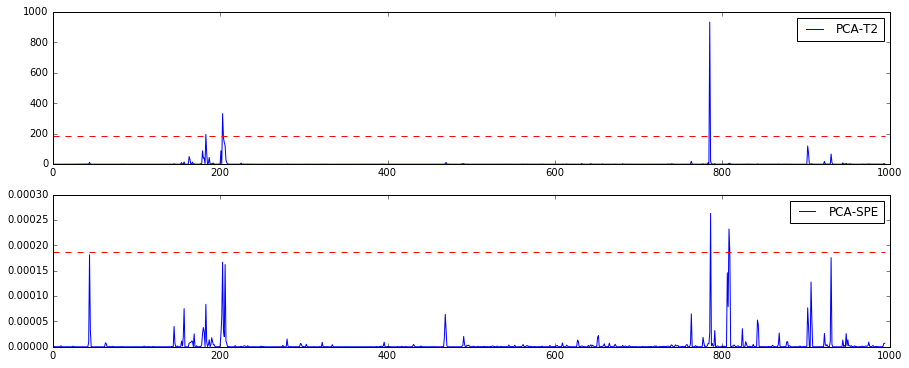

In [566]:
X_win_cov_pca=PCA(n_components=0.85).fit(X_win_cov)
X_win_cov_pca_recover=DataFrame(np.dot(X_win_cov,np.dot(X_win_cov_pca.components_.T,X_win_cov_pca.components_)),
                                index=X_win_cov.index,columns=X_win_cov.columns)

#计算T2统计量
X_win_cov_pca_T2=Series([np.dot(np.dot(np.dot(np.dot(X_win_cov.ix[i].T,X_win_cov_pca.components_.T),
                                              nlg.inv(np.diag(X_win_cov_pca.explained_variance_))),X_win_cov_pca.components_),X_win_cov.ix[i]) 
                         for i in np.arange(len(X_win_cov))],index=X_win_cov.index)
#计算SPE统计量
X_win_cov_pca_SPE=Series(np.sum((X_win_cov-X_win_cov_pca_recover)**2,axis=1),index=X_win_cov.index)

# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_win_cov_pca_T2_pdf_step=(X_win_cov_pca_T2.max()-X_win_cov_pca_T2.median())/100
X_win_cov_pca_SPE_pdf_step=(X_win_cov_pca_SPE.max()-X_win_cov_pca_SPE.median())/100

#kde及阈值估计
X_win_cov_pca_T2_scipy_kde=stats.gaussian_kde(X_win_cov_pca_T2, bw_method=my_kde_bandwidth)
X_win_cov_pca_SPE_scipy_kde=stats.gaussian_kde(X_win_cov_pca_SPE, bw_method=my_kde_bandwidth)
X_win_cov_pca_T2_threshold=get_threshold_of_scipy_kde(X_win_cov_pca_T2_scipy_kde,X_win_cov_pca_T2.min(),step=X_win_cov_pca_T2_pdf_step,confidence=0.997)
X_win_cov_pca_SPE_threshold=get_threshold_of_scipy_kde(X_win_cov_pca_SPE_scipy_kde,X_win_cov_pca_SPE.min(),step=X_win_cov_pca_SPE_pdf_step,confidence=0.997)

#绘图
plt.subplot(211)
plt.plot(X_win_cov_pca_T2.values,label='PCA-T2')
plt.plot(X_win_cov_pca_T2_threshold*np.ones(len(X_win_cov_pca_T2)),'r--')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(X_win_cov_pca_SPE.values,label='PCA-SPE')
plt.plot(X_win_cov_pca_SPE_threshold*np.ones(len(X_win_cov_pca_SPE)),'r--')
plt.legend(loc='best')

#输出异常时间段
X_win_cov_pca_T2_anomaly=X_win_cov_pca_T2[X_win_cov_pca_T2>X_win_cov_pca_T2_threshold].index
print('anomal periods detected by T2 metric are: ')
for each in zip(X_win_cov_pca_T2_anomaly,X_win_cov_pca_T2_anomaly+win):
    print(each)
print('anomal periods detected by SPE metric are: ')
X_win_cov_pca_SPE_anomaly=X_win_cov_pca_SPE[X_win_cov_pca_SPE>X_win_cov_pca_SPE_threshold].index
for each in zip(X_win_cov_pca_SPE_anomaly,X_win_cov_pca_SPE_anomaly+win):
    print(each)

### 4.3、ICA

anomal periods detected by T2 metric are: 
(Period('2016-10-09 11:00', 'T'), Period('2016-10-09 12:40', 'T'))
(Period('2016-10-09 12:00', 'T'), Period('2016-10-09 13:40', 'T'))
(Period('2016-11-02 17:40', 'T'), Period('2016-11-02 19:20', 'T'))
anomal periods detected by SPE metric are: 
(Period('2016-10-09 11:00', 'T'), Period('2016-10-09 12:40', 'T'))
(Period('2016-10-09 14:00', 'T'), Period('2016-10-09 15:40', 'T'))
(Period('2016-11-07 14:40', 'T'), Period('2016-11-07 16:20', 'T'))


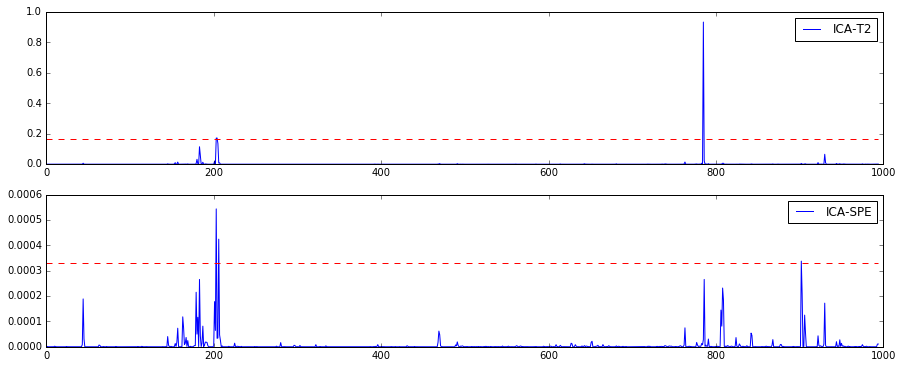

In [567]:
n=X_pca.n_components_
X_win_cov_ica=FastICA(n_components=n).fit(X_win_cov)
X_win_cov_S_=X_win_cov_ica.transform(X_win_cov)
X_win_cov_ica_recover=DataFrame(np.dot(X_win_cov_S_,X_win_cov_ica.mixing_.T)+X_win_cov_ica.mean_,
                                index=X_win_cov.index,columns=X_win_cov.columns)

#计算T2统计量
X_win_cov_ica_T2=Series(np.sum(X_win_cov_S_**2,axis=1),index=X_win_cov.index)
#计算SPE统计量
X_win_cov_ica_SPE=Series(np.sum((X_win_cov-X_win_cov_ica_recover)**2,axis=1),index=X_win_cov.index)

# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_win_cov_ica_T2_pdf_step=(X_win_cov_ica_T2.max()-X_win_cov_ica_T2.median())/100
X_win_cov_ica_SPE_pdf_step=(X_win_cov_ica_SPE.max()-X_win_cov_ica_SPE.median())/100

#kde及阈值估计
X_win_cov_ica_T2_scipy_kde=stats.gaussian_kde(X_win_cov_ica_T2, bw_method=my_kde_bandwidth)
X_win_cov_ica_SPE_scipy_kde=stats.gaussian_kde(X_win_cov_ica_SPE, bw_method=my_kde_bandwidth)
X_win_cov_ica_T2_threshold=get_threshold_of_scipy_kde(X_win_cov_ica_T2_scipy_kde,X_win_cov_ica_T2.min(),step=X_win_cov_ica_T2_pdf_step,confidence=0.997)
X_win_cov_ica_SPE_threshold=get_threshold_of_scipy_kde(X_win_cov_ica_SPE_scipy_kde,X_win_cov_ica_SPE.min(),step=X_win_cov_ica_SPE_pdf_step,confidence=0.997)

#绘图
plt.subplot(211)
plt.plot(X_win_cov_ica_T2.values,label='ICA-T2')
plt.plot(X_win_cov_ica_T2_threshold*np.ones(len(X_win_cov_ica_T2)),'r--')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(X_win_cov_ica_SPE.values,label='ICA-SPE')
plt.plot(X_win_cov_ica_SPE_threshold*np.ones(len(X_win_cov_ica_SPE)),'r--')
plt.legend(loc='best')

#输出异常时间段
X_win_cov_ica_T2_anomaly=X_win_cov_ica_T2[X_win_cov_ica_T2>X_win_cov_ica_T2_threshold].index
print('anomal periods detected by T2 metric are: ')
for each in zip(X_win_cov_ica_T2_anomaly,X_win_cov_ica_T2_anomaly+win):
    print(each)
print('anomal periods detected by SPE metric are: ')
X_win_cov_ica_SPE_anomaly=X_win_cov_ica_SPE[X_win_cov_ica_SPE>X_win_cov_ica_SPE_threshold].index
for each in zip(X_win_cov_ica_SPE_anomaly,X_win_cov_ica_SPE_anomaly+win):
    print(each)

### 4.4、LLE

anomal periods detected by T2 metric are: 
(Period('2016-10-08 15:00', 'T'), Period('2016-10-08 16:40', 'T'))
(Period('2016-11-02 17:40', 'T'), Period('2016-11-02 19:20', 'T'))
(Period('2016-11-07 14:40', 'T'), Period('2016-11-07 16:20', 'T'))


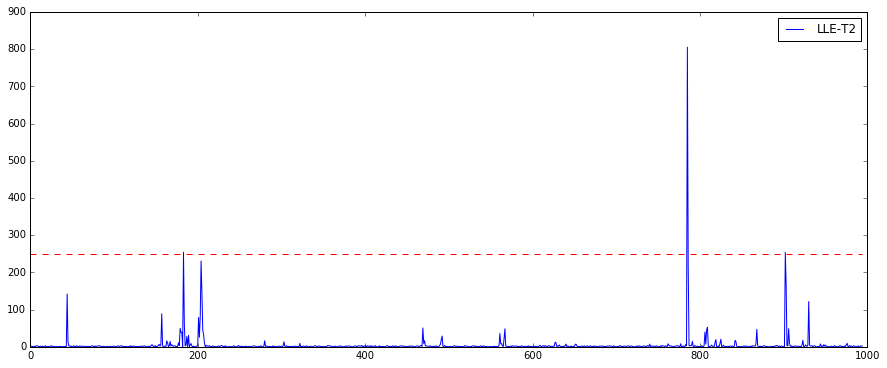

In [568]:
X_win_cov_lle_embed=manifold.LocallyLinearEmbedding(n_neighbors =10, n_components=5).fit_transform(X_win_cov)
X_win_cov_lle_embed_mean=X_win_cov_lle_embed.mean(axis=0)
X_win_cov_lle_vi=nlg.inv(np.cov(X_win_cov_lle_embed.T))

#计算的是到均值的马氏距离
X_win_cov_lle_T2=Series([np.dot(np.dot(X_win_cov_lle_embed[i]-X_win_cov_lle_embed_mean,X_win_cov_lle_vi),
                                X_win_cov_lle_embed[i]-X_win_cov_lle_embed_mean)
                 for i in np.arange(len(X_win_cov_lle_embed))],index=X_win_cov.index)

# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_win_cov_lle_T2_pdf_step=(X_win_cov_lle_T2.max()-X_win_cov_lle_T2.median())/100

#kde及阈值估计
X_win_cov_lle_T2_scipy_kde=stats.gaussian_kde(X_win_cov_lle_T2, bw_method=my_kde_bandwidth)
X_win_cov_lle_T2_threshold=get_threshold_of_scipy_kde(X_win_cov_lle_T2_scipy_kde,X_win_cov_lle_T2.min(),step=X_win_cov_lle_T2_pdf_step,confidence=0.997)

#绘图
plt.plot(X_win_cov_lle_T2.values,label='LLE-T2')
plt.plot(X_win_cov_lle_T2_threshold*np.ones(len(X_win_cov_lle_T2)),'r--')
plt.legend(loc='best')

#输出异常时间段
X_win_cov_lle_T2_anomaly=X_win_cov_lle_T2[X_win_cov_lle_T2>X_win_cov_lle_T2_threshold].index
print('anomal periods detected by T2 metric are: ')
for each in zip(X_win_cov_lle_T2_anomaly,X_win_cov_lle_T2_anomaly+win):
    print(each)

## 5、基于PCA残差空间的异常检测算法

> 原始数据空间包含三部分：正常数据、异常数据和噪声，从能量占比考虑，一般情况是：power(正常数据)>power(异常数据)>power(噪声)，对原始数据进行一次PCA降维处理时，将噪声和异常划入残差空间。此时，可对残差空间做进一步划分，如采用常规的PCA/ICA进行异常检测处理，通过T2可识别异常点。

### 5.1、PCA残差数据探索

In [569]:
X_pca_residual=X-X_pca_recover
X_pca_residual_pca=PCA().fit(X_pca_residual)

print('covariance matrix is:\n',X_pca_residual.corr())
print('\nexplained_variance is: \n',X_pca_residual_pca.explained_variance_)
print('\nexplained_variance ratio is: \n',X_pca_residual_pca.explained_variance_ratio_)

covariance matrix is:
             vCpuUsage  vDiskRead  vDiskWrite  vNwEgress  vNwIngress  vMemUsage
vCpuUsage    1.000000  -0.057780   -0.284012  -0.998478   -0.815879   0.994991
vDiskRead   -0.057780   1.000000    0.514899   0.030002    0.022926  -0.049442
vDiskWrite  -0.284012   0.514899    1.000000   0.232591    0.219640  -0.280952
vNwEgress   -0.998478   0.030002    0.232591   1.000000    0.806866  -0.992113
vNwIngress  -0.815879   0.022926    0.219640   0.806866    1.000000  -0.869525
vMemUsage    0.994991  -0.049442   -0.280952  -0.992113   -0.869525   1.000000

explained_variance is: 
 [  5.08337243e-03   6.41023162e-04   3.16248597e-04   8.44309224e-05
   5.36399490e-32   1.20775832e-32]

explained_variance ratio is: 
 [  8.29928178e-01   1.04655559e-01   5.16317908e-02   1.37844713e-02
   8.75743530e-30   1.97182614e-30]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd82217f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ddb2ffc88>]], dtype=object)

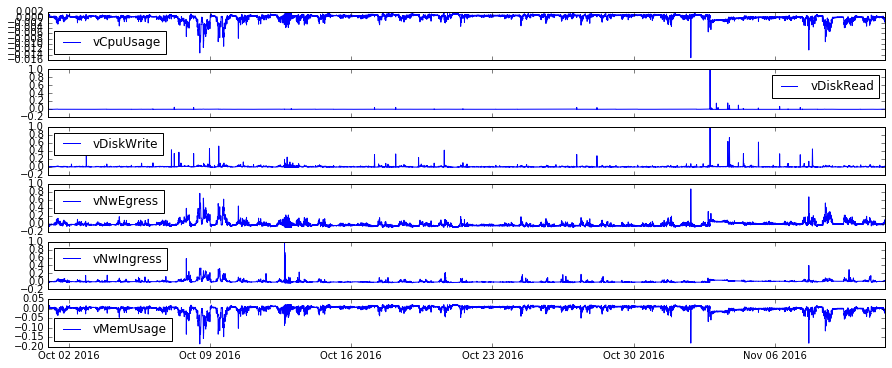

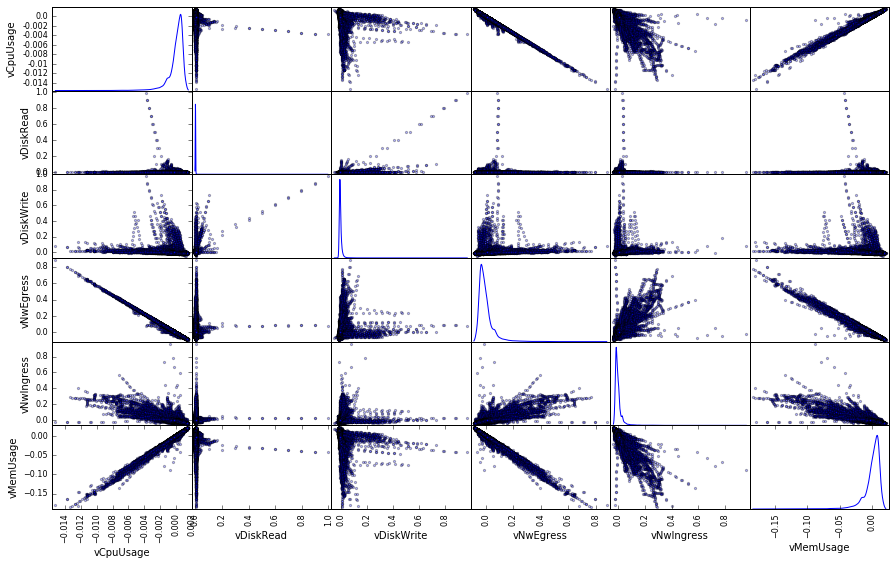

In [570]:
fig,axes=plt.subplots(X_pca_residual.shape[1],1,sharex=True)
xtick=X_pca_residual.index.to_datetime()
for i in range(X_pca_residual.shape[1]):
    axes[i].plot(xtick,X_pca_residual.ix[:,i],label=X_pca_residual.columns[i])
    axes[i].legend(loc='best')

pd.scatter_matrix(X_pca_residual,diagonal='kde',color='k',alpha=0.3,figsize=(15,9))

> 无论是从相关系数还是图示来看，残差空间(体现异常和噪声)的相关性更为明显，说明各维度的异常变化联系非常紧密！

### 5.2、PCA

anomal periods detected by T2 metric are: 
(Period('2016-10-02 21:10', 'T'), Period('2016-10-02 21:11', 'T'))
(Period('2016-10-07 02:20', 'T'), Period('2016-10-07 02:26', 'T'))
(Period('2016-10-07 05:42', 'T'), Period('2016-10-07 05:46', 'T'))
(Period('2016-10-07 11:11', 'T'), Period('2016-10-07 11:16', 'T'))
(Period('2016-10-08 04:43', 'T'), Period('2016-10-08 04:45', 'T'))
(Period('2016-10-08 11:58', 'T'), Period('2016-10-08 12:06', 'T'))
(Period('2016-10-08 23:32', 'T'), Period('2016-10-08 23:38', 'T'))
(Period('2016-10-09 10:31', 'T'), Period('2016-10-09 10:39', 'T'))
(Period('2016-10-17 03:44', 'T'), Period('2016-10-17 03:46', 'T'))
(Period('2016-10-18 04:55', 'T'), Period('2016-10-18 04:57', 'T'))
(Period('2016-10-20 14:37', 'T'), Period('2016-10-20 14:43', 'T'))
(Period('2016-10-27 04:05', 'T'), Period('2016-10-27 04:07', 'T'))
(Period('2016-10-28 04:10', 'T'), Period('2016-10-28 04:10', 'T'))
(Period('2016-11-01 19:45', 'T'), Period('2016-11-01 19:45', 'T'))
(Period('2016-11-02

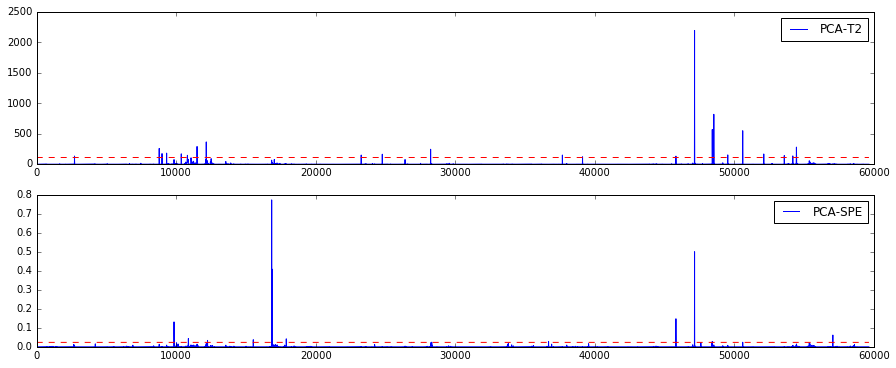

In [571]:
#提取异常
X_pca_residual_pca=PCA(n_components=0.85).fit(X_pca_residual)
X_pca_residual_pca_T=DataFrame(X_pca_residual_pca.transform(X_pca_residual),index=X_pca_residual.index)
X_pca_residual_pca_recover=DataFrame(np.dot(X_pca_residual_pca_T,X_pca_residual_pca.components_),index=X_pca_residual.index,columns=X_pca_residual.columns)

#计算T2统计量（实际上是各样本得分值先平方再按特征值归一化后求和）
X_pca_residual_pca_T2=Series(np.sum(X_pca_residual_pca_T**2/X_pca_residual_pca.explained_variance_,axis=1),index=X_pca_residual.index)
#计算SPE统计量
X_pca_residual_pca_SPE=Series(np.sum((X_pca_residual-X_pca_residual_pca_recover)**2,axis=1),index=X_pca_residual.index)

#通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_pca_residual_pca_T2_pdf_step=(X_pca_residual_pca_T2.max()-X_pca_residual_pca_T2.median())/100
X_pca_residual_pca_SPE_pdf_step=(X_pca_residual_pca_SPE.max()-X_pca_residual_pca_SPE.median())/100

#kde及阈值估计
X_pca_residual_pca_T2_scipy_kde=stats.gaussian_kde(X_pca_residual_pca_T2, bw_method=my_kde_bandwidth)
X_pca_residual_pca_SPE_scipy_kde=stats.gaussian_kde(X_pca_residual_pca_SPE, bw_method=my_kde_bandwidth)
X_pca_residual_pca_T2_threshold=get_threshold_of_scipy_kde(X_pca_residual_pca_T2_scipy_kde,X_pca_residual_pca_T2.min(),step=X_pca_residual_pca_T2_pdf_step,confidence=0.997)
X_pca_residual_pca_SPE_threshold=get_threshold_of_scipy_kde(X_pca_residual_pca_SPE_scipy_kde,X_pca_residual_pca_SPE.min(),step=X_pca_residual_pca_SPE_pdf_step,confidence=0.997)

#绘图
plt.subplot(211)
plt.plot(X_pca_residual_pca_T2.values,label='PCA-T2')
plt.plot(X_pca_residual_pca_T2_threshold*np.ones(len(X_pca_residual_pca_T2)),'r--')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(X_pca_residual_pca_SPE.values,label='PCA-SPE')
plt.plot(X_pca_residual_pca_SPE_threshold*np.ones(len(X_pca_residual_pca_SPE)),'r--')
plt.legend(loc='best')

#输出异常时间段
X_pca_residual_pca_T2_anomaly=X_pca_residual_pca_T2[X_pca_residual_pca_T2>X_pca_residual_pca_T2_threshold].index
if len(X_pca_residual_pca_T2_anomaly)!=0:
    indice=pd.Series([True]+list(np.diff(X_pca_residual_pca_T2_anomaly)>10))
    X_pca_residual_pca_T2_anomaly_start=X_pca_residual_pca_T2_anomaly[indice].tolist()
    X_pca_residual_pca_T2_anomaly_end=X_pca_residual_pca_T2_anomaly[indice.shift(-1).fillna(False)].tolist()
    X_pca_residual_pca_T2_anomaly_end.append(X_pca_residual_pca_T2_anomaly[-1])
    print('anomal periods detected by T2 metric are: ')
    for each in zip(X_pca_residual_pca_T2_anomaly_start,X_pca_residual_pca_T2_anomaly_end):    
        print(each)
else:
    print('there\'s no anomal periods detected by T2 metric ')
    
X_pca_residual_pca_SPE_anomaly=X_pca_residual_pca_SPE[X_pca_residual_pca_SPE>X_pca_residual_pca_SPE_threshold].index
if len(X_pca_residual_pca_SPE_anomaly)!=0:
    indice=pd.Series([True]+list(np.diff(X_pca_residual_pca_SPE_anomaly)>10))
    X_pca_residual_pca_SPE_anomaly_start=X_pca_residual_pca_SPE_anomaly[indice].tolist()
    X_pca_residual_pca_SPE_anomaly_end=X_pca_residual_pca_SPE_anomaly[indice.shift(-1).fillna(False)].tolist()
    X_pca_residual_pca_SPE_anomaly_end.append(X_pca_residual_pca_SPE_anomaly[-1])
    print('anomal periods detected by SPE metric are: ')
    for each in zip(X_pca_residual_pca_SPE_anomaly_start,X_pca_residual_pca_SPE_anomaly_end):
        print(each)
else:
    print('there\'s no anomal periods detected by SPE metric ')

### 5.3、ICA

In [572]:
n=X_pca_residual_pca.n_components_+1

> 关于ICA独立成分的确定，从之前SPE贡献图看，除CPU和Memory之外的其余四维贡献较多，而这四维中，(NwEgress,NwIngress)、（DiskRead,DiskWrite）从原始数据看，具有较强的相关性（从残差的PCA成分看，也主要集中在两个维度），因此采用ICA算法时，可假定先至少具有由PCA所确定的独立成分，考虑噪声影响，再增加1个独立成分个数。

anomal periods detected by T2 metric are: 
(Period('2016-10-07 02:21', 'T'), Period('2016-10-07 02:25', 'T'))
(Period('2016-10-07 05:44', 'T'), Period('2016-10-07 05:44', 'T'))
(Period('2016-10-07 11:13', 'T'), Period('2016-10-07 11:14', 'T'))
(Period('2016-10-07 19:59', 'T'), Period('2016-10-07 20:08', 'T'))
(Period('2016-10-08 04:44', 'T'), Period('2016-10-08 04:44', 'T'))
(Period('2016-10-08 12:04', 'T'), Period('2016-10-08 12:04', 'T'))
(Period('2016-10-08 13:13', 'T'), Period('2016-10-08 13:14', 'T'))
(Period('2016-10-08 23:33', 'T'), Period('2016-10-08 23:37', 'T'))
(Period('2016-10-09 10:32', 'T'), Period('2016-10-09 10:38', 'T'))
(Period('2016-10-12 16:44', 'T'), Period('2016-10-12 17:21', 'T'))
(Period('2016-10-17 03:45', 'T'), Period('2016-10-17 03:45', 'T'))
(Period('2016-10-18 04:56', 'T'), Period('2016-10-18 04:56', 'T'))
(Period('2016-10-20 14:38', 'T'), Period('2016-10-20 14:42', 'T'))
(Period('2016-10-27 04:06', 'T'), Period('2016-10-27 04:06', 'T'))
(Period('2016-11-01

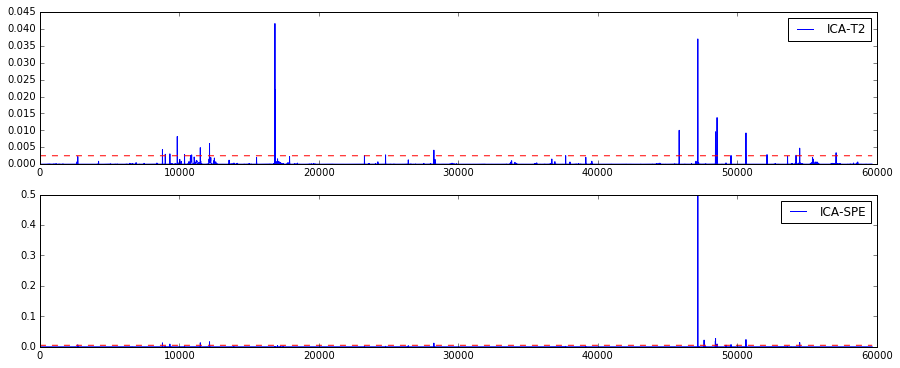

In [573]:
X_pca_residual_ica=FastICA(n_components=n).fit(X_pca_residual)
X_pca_residual_S_=X_pca_residual_ica.transform(X_pca_residual)
X_pca_residual_ica_recover=DataFrame(np.dot(X_pca_residual_S_,X_pca_residual_ica.mixing_.T)+X_pca_residual_ica.mean_,
                                index=X_pca_residual.index,columns=X_pca_residual.columns)

#计算T2统计量
X_pca_residual_ica_T2=Series(np.sum(X_pca_residual_S_**2,axis=1),index=X_pca_residual.index)
#计算SPE统计量
X_pca_residual_ica_SPE=Series(np.sum((X_pca_residual-X_pca_residual_ica_recover)**2,axis=1),index=X_pca_residual.index)

# 通过概率密度函数求解概率时的累加步长设置(中位数与最大值距离100步)
X_pca_residual_ica_T2_pdf_step=(X_pca_residual_ica_T2.max()-X_pca_residual_ica_T2.median())/100
X_pca_residual_ica_SPE_pdf_step=(X_pca_residual_ica_SPE.max()-X_pca_residual_ica_SPE.median())/100

#kde及阈值估计
X_pca_residual_ica_T2_scipy_kde=stats.gaussian_kde(X_pca_residual_ica_T2, bw_method=my_kde_bandwidth)
X_pca_residual_ica_SPE_scipy_kde=stats.gaussian_kde(X_pca_residual_ica_SPE, bw_method=my_kde_bandwidth)
X_pca_residual_ica_T2_threshold=get_threshold_of_scipy_kde(X_pca_residual_ica_T2_scipy_kde,X_pca_residual_ica_T2.min(),step=X_pca_residual_ica_T2_pdf_step,confidence=0.997)
X_pca_residual_ica_SPE_threshold=get_threshold_of_scipy_kde(X_pca_residual_ica_SPE_scipy_kde,X_pca_residual_ica_SPE.min(),step=X_pca_residual_ica_SPE_pdf_step,confidence=0.997)

#绘图
plt.subplot(211)
plt.plot(X_pca_residual_ica_T2.values,label='ICA-T2')
plt.plot(X_pca_residual_ica_T2_threshold*np.ones(len(X_pca_residual_ica_T2)),'r--')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(X_pca_residual_ica_SPE.values,label='ICA-SPE')
plt.plot(X_pca_residual_ica_SPE_threshold*np.ones(len(X_pca_residual_ica_SPE)),'r--')
plt.legend(loc='best')

#输出异常时间段
X_pca_residual_ica_T2_anomaly=X_pca_residual_ica_T2[X_pca_residual_ica_T2>X_pca_residual_ica_T2_threshold].index
if len(X_pca_residual_ica_T2_anomaly)!=0:
    indice=pd.Series([True]+list(np.diff(X_pca_residual_ica_T2_anomaly)>10))
    X_pca_residual_ica_T2_anomaly_start=X_pca_residual_ica_T2_anomaly[indice].tolist()
    X_pca_residual_ica_T2_anomaly_end=X_pca_residual_ica_T2_anomaly[indice.shift(-1).fillna(False)].tolist()
    X_pca_residual_ica_T2_anomaly_end.append(X_pca_residual_ica_T2_anomaly[-1])
    print('anomal periods detected by T2 metric are: ')
    for each in zip(X_pca_residual_ica_T2_anomaly_start,X_pca_residual_ica_T2_anomaly_end):    
        print(each)
else:
    print('there\'s no anomal periods detected by T2 metric ')
    
X_pca_residual_ica_SPE_anomaly=X_pca_residual_ica_SPE[X_pca_residual_ica_SPE>X_pca_residual_ica_SPE_threshold].index
if len(X_pca_residual_ica_SPE_anomaly)!=0:
    indice=pd.Series([True]+list(np.diff(X_pca_residual_ica_SPE_anomaly)>10))
    X_pca_residual_ica_SPE_anomaly_start=X_pca_residual_ica_SPE_anomaly[indice].tolist()
    X_pca_residual_ica_SPE_anomaly_end=X_pca_residual_ica_SPE_anomaly[indice.shift(-1).fillna(False)].tolist()
    X_pca_residual_ica_SPE_anomaly_end.append(X_pca_residual_ica_SPE_anomaly[-1])
    print('anomal periods detected by SPE metric are: ')
    for each in zip(X_pca_residual_ica_SPE_anomaly_start,X_pca_residual_ica_SPE_anomaly_end):
        print(each)
else:
    print('there\'s no anomal periods detected by SPE metric ')

## 6、图形展示需求

### 6.1、查看异常时间点的原始数据

In [574]:
X_Original.ix[X_ica_SPE_anomaly_start]

,vCpuUsage,vDiskRead,vDiskWrite,vNwEgress,vNwIngress,vMemUsage
vtime,,,,,,
2016-10-07 20:01,4.60,0.000,31296.768,60219.580,109652.371,3301.00
2016-10-08 11:41,14.38,0.000,37113.940,86597.184,76406.246,3499.00
2016-10-08 12:42,59.01,0.000,36463.226,85786.260,66792.932,3513.00
2016-10-08 16:12,23.93,0.000,39107.585,90094.564,47511.282,3412.00
2016-10-09 09:54,10.46,0.170,54502.015,83759.954,72033.717,3282.00
2016-10-09 10:34,17.98,8527.869,278648.579,48804.647,36567.128,3322.00
2016-10-09 16:21,47.29,3790.164,39353.856,89046.990,46490.976,3230.00
2016-10-12 16:45,10.44,0.000,126733.020,6102.640,190505.480,3415.00
2016-10-12 17:00,7.33,0.000,70572.060,8828.840,163546.310,3453.75


### 6.2、观察异常时间点附近的数据片段

In [575]:
#观察时间拓展为异常时间点前后n小时
view_range = 3*60
view_period=map(lambda x:pd.period_range(x-view_range,x+view_range,freq='T'),X_ica_SPE_anomaly_start)

the observation window of the anomal time is :
 PeriodIndex(['2016-10-07 17:01', '2016-10-07 17:02', '2016-10-07 17:03',
             '2016-10-07 17:04', '2016-10-07 17:05', '2016-10-07 17:06',
             '2016-10-07 17:07', '2016-10-07 17:08', '2016-10-07 17:09',
             '2016-10-07 17:10',
             ...
             '2016-10-07 22:52', '2016-10-07 22:53', '2016-10-07 22:54',
             '2016-10-07 22:55', '2016-10-07 22:56', '2016-10-07 22:57',
             '2016-10-07 22:58', '2016-10-07 22:59', '2016-10-07 23:00',
             '2016-10-07 23:01'],
            dtype='int64', length=361, freq='T')


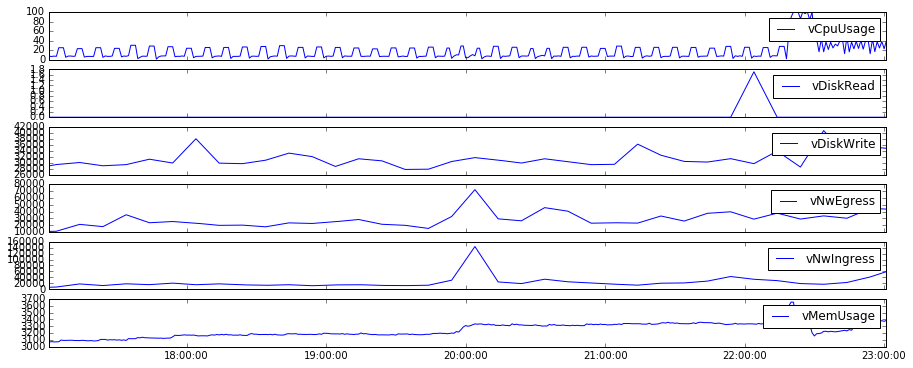

In [576]:
#通过generator输出观察结果
try:
    time=view_period.__next__()
    print('the observation window of the anomal time is :\n',time)
    
    fig,axes=plt.subplots(X_Original.shape[1],1,sharex=True)
    xtick=time.to_datetime()
    for j in range(X_Original.shape[1]):
        axes[j].plot(xtick,X_Original.ix[time,j],label=X_Original.columns[j])
        axes[j].legend(loc='upper right')
        
except StopIteration:
    print('output over!')

### 6.3、整体展示

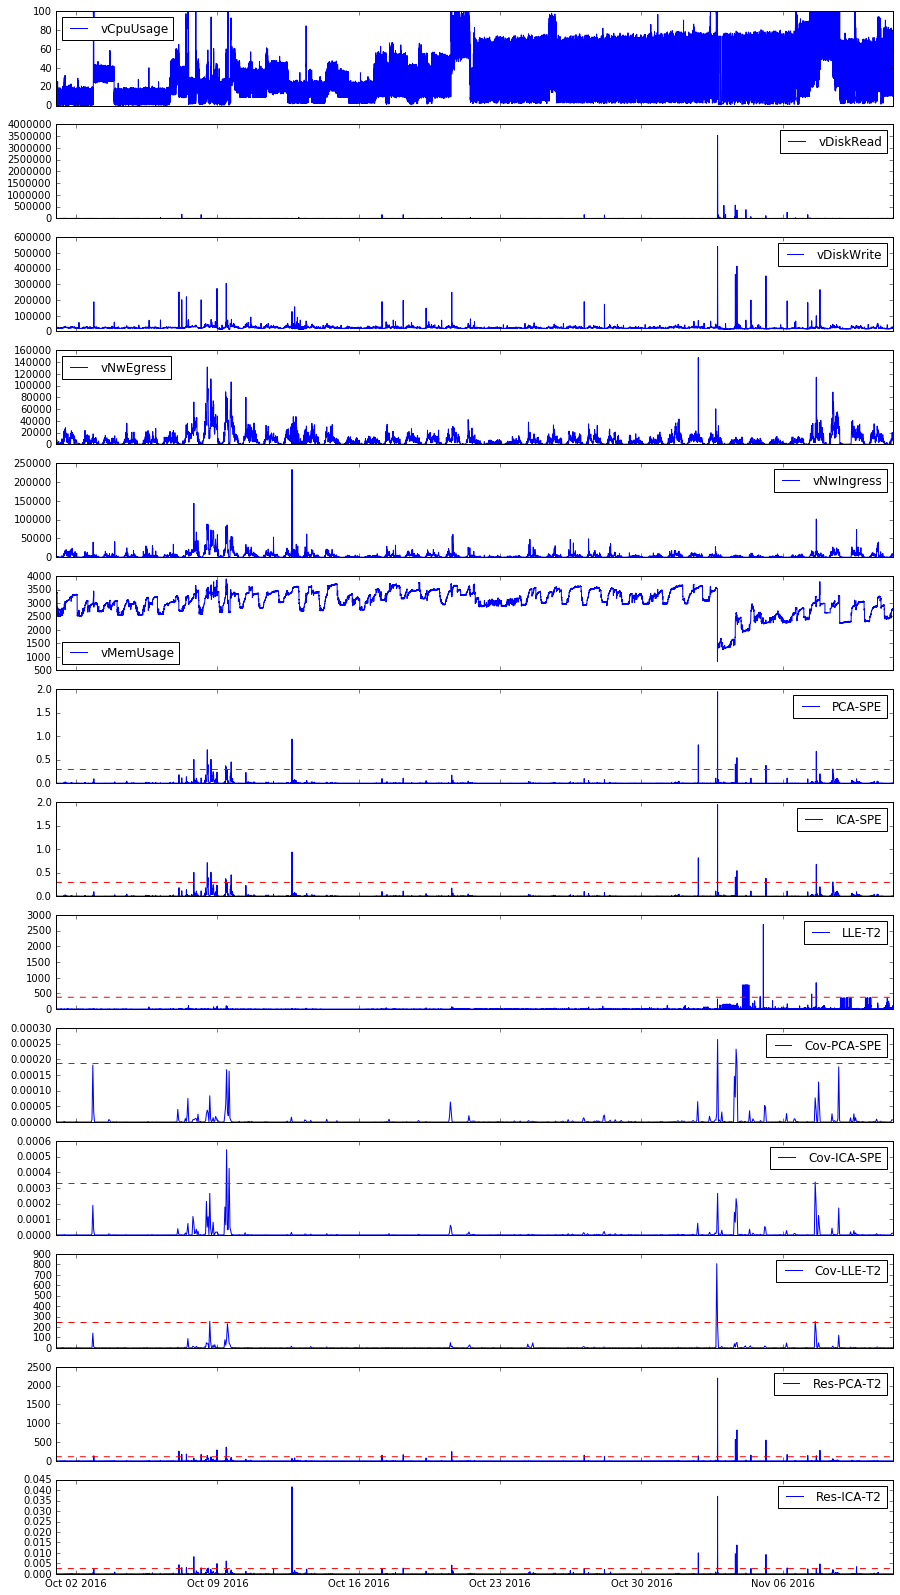

In [577]:
#对照检测的异常时刻，观察原始数据
fig_num=X_Original.shape[1]+8
plt.rc('figure', figsize=(15, 2*fig_num))

fig,axes=plt.subplots(fig_num,1,sharex=True)
xtick=X_Original.index.to_datetime()
for i in range(X_Original.shape[1]):
    axes[i].plot(xtick,X_Original.ix[:,i],label=X_Original.columns[i])
    axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_pca_T2.values,label='PCA-T2')
axes[i].plot(xtick,X_pca_T2_threshold*np.ones(len(X_pca_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_pca_SPE.values,label='PCA-SPE')
axes[i].plot(xtick,X_pca_SPE_threshold*np.ones(len(X_pca_SPE)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_ica_T2.values,label='ICA-T2')
axes[i].plot(xtick,X_ica_T2_threshold*np.ones(len(X_ica_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_ica_SPE.values,label='ICA-SPE')
axes[i].plot(xtick,X_ica_SPE_threshold*np.ones(len(X_ica_SPE)),'r--')
axes[i].legend(loc='best')
i=i+1
axes[i].plot(xtick,X_lle_T2.values,label='LLE-T2')
axes[i].plot(xtick,X_lle_T2_threshold*np.ones(len(X_lle_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick[::step],X_win_cov_pca_T2.values,label='Cov-PCA-T2')
axes[i].plot(xtick[::step],X_win_cov_pca_T2_threshold*np.ones(len(X_win_cov_pca_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick[::step],X_win_cov_pca_SPE.values,label='Cov-PCA-SPE')
axes[i].plot(xtick[::step],X_win_cov_pca_SPE_threshold*np.ones(len(X_win_cov_pca_SPE)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick[::step],X_win_cov_ica_T2.values,label='Cov-ICA-T2')
axes[i].plot(xtick[::step],X_win_cov_ica_T2_threshold*np.ones(len(X_win_cov_ica_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick[::step],X_win_cov_ica_SPE.values,label='Cov-ICA-SPE')
axes[i].plot(xtick[::step],X_win_cov_ica_SPE_threshold*np.ones(len(X_win_cov_ica_SPE)),'r--')
axes[i].legend(loc='best')
i=i+1
axes[i].plot(xtick[::step],X_win_cov_lle_T2.values,label='Cov-LLE-T2')
axes[i].plot(xtick[::step],X_win_cov_lle_T2_threshold*np.ones(len(X_win_cov_lle_T2)),'r--')
axes[i].legend(loc='best')
i=i+1
axes[i].plot(xtick,X_pca_residual_pca_T2.values,label='Res-PCA-T2')
axes[i].plot(xtick,X_pca_residual_pca_T2_threshold*np.ones(len(X_pca_residual_pca_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_pca_residual_pca_SPE.values,label='Res-PCA-SPE')
axes[i].plot(xtick,X_pca_residual_pca_SPE_threshold*np.ones(len(X_pca_residual_pca_SPE)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_pca_residual_ica_T2.values,label='Res-ICA-T2')
axes[i].plot(xtick,X_pca_residual_ica_T2_threshold*np.ones(len(X_pca_residual_ica_T2)),'r--')
axes[i].legend(loc='best')
'''
i=i+1
axes[i].plot(xtick,X_pca_residual_ica_SPE.values,label='Res-ICA-SPE')
axes[i].plot(xtick,X_pca_residual_ica_SPE_threshold*np.ones(len(X_pca_residual_ica_SPE)),'r--')
axes[i].legend(loc='best')
'''
plt.rc('figure', figsize=(15, 6)) #恢复